# Fraud detection

## Fraud_Data DataFrame:
* ## user_id: Unique user identifier.
* ## signup_time: Timestamp of user sign-up.
* ## purchase_time: Timestamp of purchase.
* ## purchase_value: Value of the purchase.
* ## device_id: Unique device identifier.
* ## source: Source of user arrival.
* ## browser: Web browser used by the user.
* ## sex: Gender of the user.
* ## age: Age of the user.
* ## ip_address: User's IP address.
* ## class: Transaction class (0 for non-fraudulent, 1 for fraudulent).
 
## ip_country_mapping DataFrame:
* ## lower_bound_ip_address: Lower bound of IP address range.
* ## upper_bound_ip_address: Upper bound of IP address range.
* ## country: Country associated with the IP address range.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import datetime
import calendar
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Read the datasets
user_info = pd.read_csv("../input/fraud-ecommerce/Fraud_Data.csv")         # Users information
ip_country_mapping = pd.read_csv("../input/fraud-ecommerce/IpAddress_to_Country.csv")  # Country from IP information

In [2]:
ip_country_mapping.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [3]:
ip_country_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [4]:
user_info.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [5]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
ip_country_mapping.upper_bound_ip_address.astype("float")
ip_country_mapping.lower_bound_ip_address.astype("float")
user_info.ip_address.astype("float")

0         7.327584e+08
1         3.503114e+08
2         2.621474e+09
3         3.840542e+09
4         4.155831e+08
              ...     
151107    3.451155e+09
151108    2.439047e+09
151109    2.748471e+09
151110    3.601175e+09
151111    4.103825e+09
Name: ip_address, Length: 151112, dtype: float64

In [7]:
def IP_to_country(ip) :
    try :
        return ip_country_mapping.country[(ip_country_mapping.lower_bound_ip_address < ip)                            
                                & 
                                (ip_country_mapping.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Unknown"   

In [8]:
import os

# Define the directory path
directory = "/kaggle/working/datasets_fraud"

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)
    
# country to each IP
user_info["IP_country"] = user_info.ip_address.apply(IP_to_country)

# saving
user_info.to_csv("/kaggle/working/datasets_fraud/Fraud_data_with_country.csv",index=False)


In [9]:
# loading
user_info= pd.read_csv("/kaggle/working/datasets_fraud/Fraud_data_with_country.csv")

user_info.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class     IP_country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        Unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

In [10]:
def IP_to_country2(ip) :
    try :
        return ip_country_mapping.country[(ip_country_mapping.lower_bound_ip_address < ip)                            
                                & 
                                (ip_country_mapping.upper_bound_ip_address > ip)]
    except IndexError :
        return "Unknown"     
    
print(IP_to_country2(user_info.iloc[0]['ip_address']))
print(IP_to_country2(user_info.iloc[1]['ip_address']))

4554    Japan
Name: country, dtype: object
1017    United States
Name: country, dtype: object


In [11]:
# Print summary statistics 
print(user_info[["purchase_value", "age"]].describe())
print('*'*50)
# Print unique values and their frequencies 
for column in ["source", "browser", "sex"]:
    print(user_info[column].value_counts())
    print('*'*50)

# Check for duplicates in the "user_id" column in user_info DataFrame
print("The user_id column includes {} duplicates".format(user_info.duplicated(subset="user_id", keep=False).sum()))


       purchase_value            age
count   151112.000000  151112.000000
mean        36.935372      33.140704
std         18.322762       8.617733
min          9.000000      18.000000
25%         22.000000      27.000000
50%         35.000000      33.000000
75%         49.000000      39.000000
max        154.000000      76.000000
**************************************************
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
**************************************************
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
**************************************************
sex
M    88293
F    62819
Name: count, dtype: int64
**************************************************
The user_id column includes 0 duplicates


In [12]:
# Calculate duplicate rate based on unique device_id
dup_table = pd.DataFrame(user_info.duplicated(subset="device_id"))
dup_rate = dup_table.mean()
print("{}% of the dataset is comprised of transactions from a device_id that had been previously used".format(int(dup_rate * 1000) / 10))

# Calculate duplicate rate based on device_id with keep=False
dup_table2 = pd.DataFrame(user_info.duplicated(subset="device_id", keep=False))
dup_rate2 = dup_table2.mean()
print("{}% of the dataset is comprised of transactions from a device_id that had been previously used".format(int(dup_rate2 * 1000) / 10))


8.7% of the dataset is comprised of transactions from a device_id that had been previously used
12.7% of the dataset is comprised of transactions from a device_id that had been previously used


In [13]:
device_duplicates = pd.DataFrame(user_info.groupby(by="device_id").device_id.count())
device_duplicates.rename(columns={"device_id": "freq_device"}, inplace=True)
device_duplicates.reset_index(level=0, inplace=True)
dupli = device_duplicates[device_duplicates.freq_device >1]
dupli

device_id  freq_device
3       AAAXXOZJRZRAO           11
33      AAEWGRKQJJMVI            2
35      AAFBODGQYEMVK            2
63      AAIGAICKBXPSW            2
73      AAJCSUCPHKORJ            2
...               ...          ...
137857  ZZKXASRAZPHYR            2
137883  ZZOTFEMHJONTA            2
137898  ZZQPVRBHRMVYD           12
137917  ZZUBRTQITHWAO            2
137944  ZZYPLUFCXTHUS            2

[6175 rows x 2 columns]

In [14]:
# Reading the Dataset
user_info = pd.read_csv("/kaggle/working/datasets_fraud/Fraud_data_with_country.csv")

device_duplicates = pd.DataFrame(user_info.groupby(by = "device_id").device_id.count())  
device_duplicates.rename(columns={"device_id": "freq_device"}, inplace=True)           
device_duplicates.reset_index(level=0, inplace= True)                                 

dupli = device_duplicates[device_duplicates.freq_device >1]
print("On average, when a device is used more than once it is used {mean} times, and the most used machine was used {maxi} times"
      .format(mean = int(dupli.freq_device.mean()*10)/10, maxi = int(dupli.freq_device.max()*10)/10))

dupli = device_duplicates[device_duplicates.freq_device >2]
print("On average, when a device is used more than twice it is used {mean} times"
      .format(mean = int(dupli.freq_device.mean()*10)/10, maxi = int(dupli.freq_device.max()*10)/10))


On average, when a device is used more than once it is used 3.1 times, and the most used machine was used 20.0 times
On average, when a device is used more than twice it is used 10.2 times


In [15]:
# Merge the device_duplicates with user_info
user_info = user_info.merge(device_duplicates, on="device_id")

In [16]:
# Calculate the proportion of fraud in the dataset
fraud_proportion = user_info["class"].mean() * 100
print("Proportion of fraud in the dataset: {:.1f}%".format(fraud_proportion))


Proportion of fraud in the dataset: 9.4%


In [17]:
user_info.describe()

user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class    freq_device  
count  151112.000000  151112.000000  
mean        0.093646       1.684367  
std         0.291336       2.616954  
min         0.000000       1.000000  
25%         0.000000       1.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         1.000000      20.000000

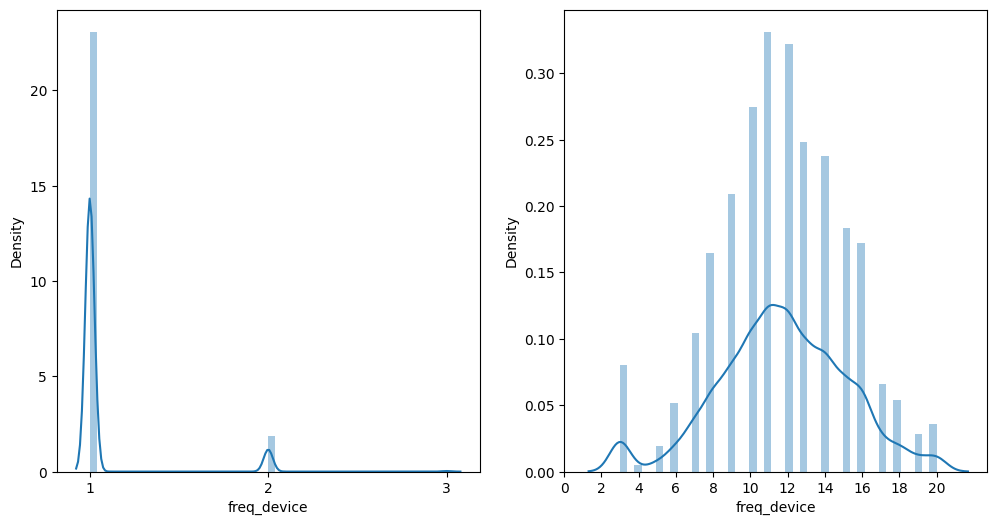

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot device frequency distribution for values less than 4
g1 = sns.distplot(user_info.freq_device[user_info.freq_device < 4], ax=ax[0])
g1.set(xticks=[1, 2, 3])

# Plot device frequency distribution for values greater than 2
g2 = sns.distplot(user_info.freq_device[user_info.freq_device > 2], ax=ax[1])
g2.set(xticks=range(0, 21, 2))

# Display the plots
plt.show()


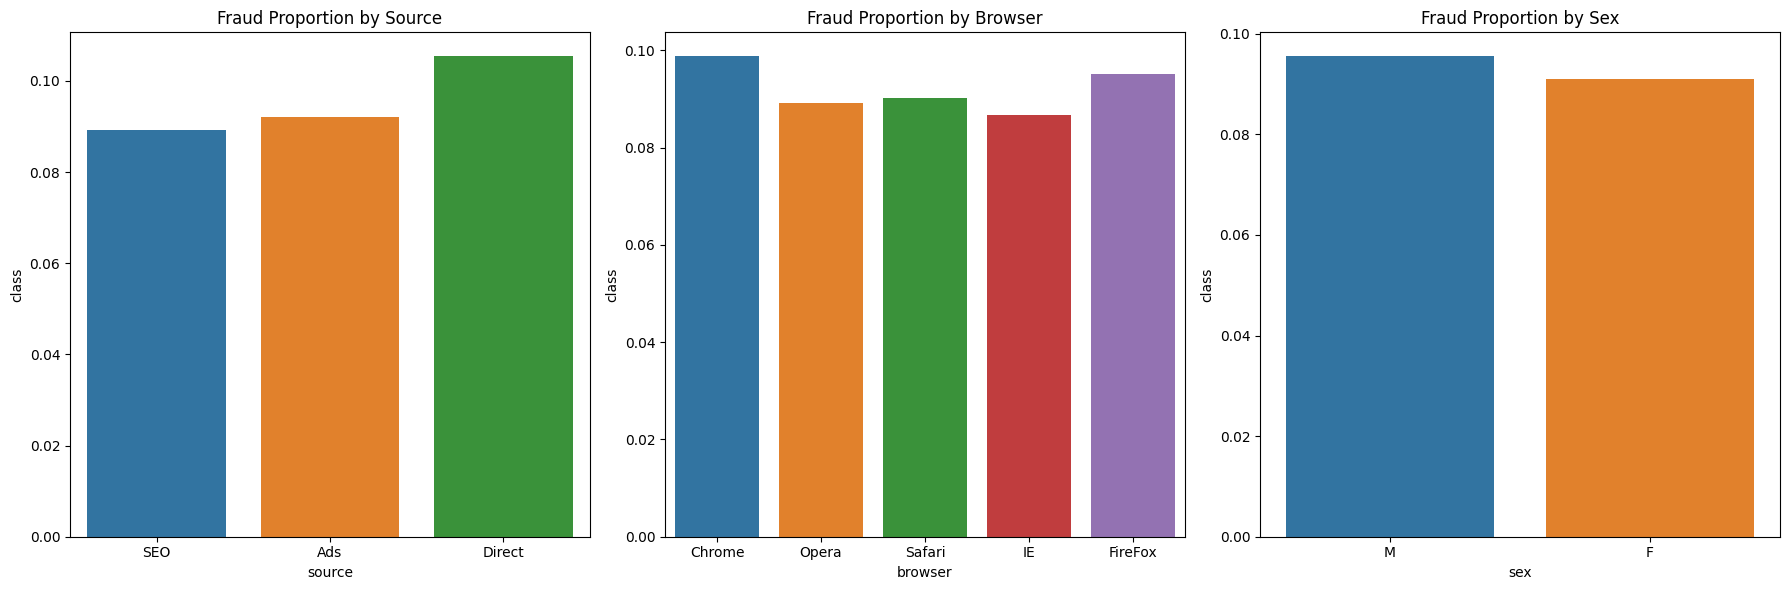

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 6))

# Create subplots for bar plots
plt.subplot(1, 3, 1)
sns.barplot(x='source', y='class', data=user_info, ci=None)
plt.title('Fraud Proportion by Source')

plt.subplot(1, 3, 2)
sns.barplot(x='browser', y='class', data=user_info, ci=None)
plt.title('Fraud Proportion by Browser')

plt.subplot(1, 3, 3)
sns.barplot(x='sex', y='class', data=user_info, ci=None)
plt.title('Fraud Proportion by Sex')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


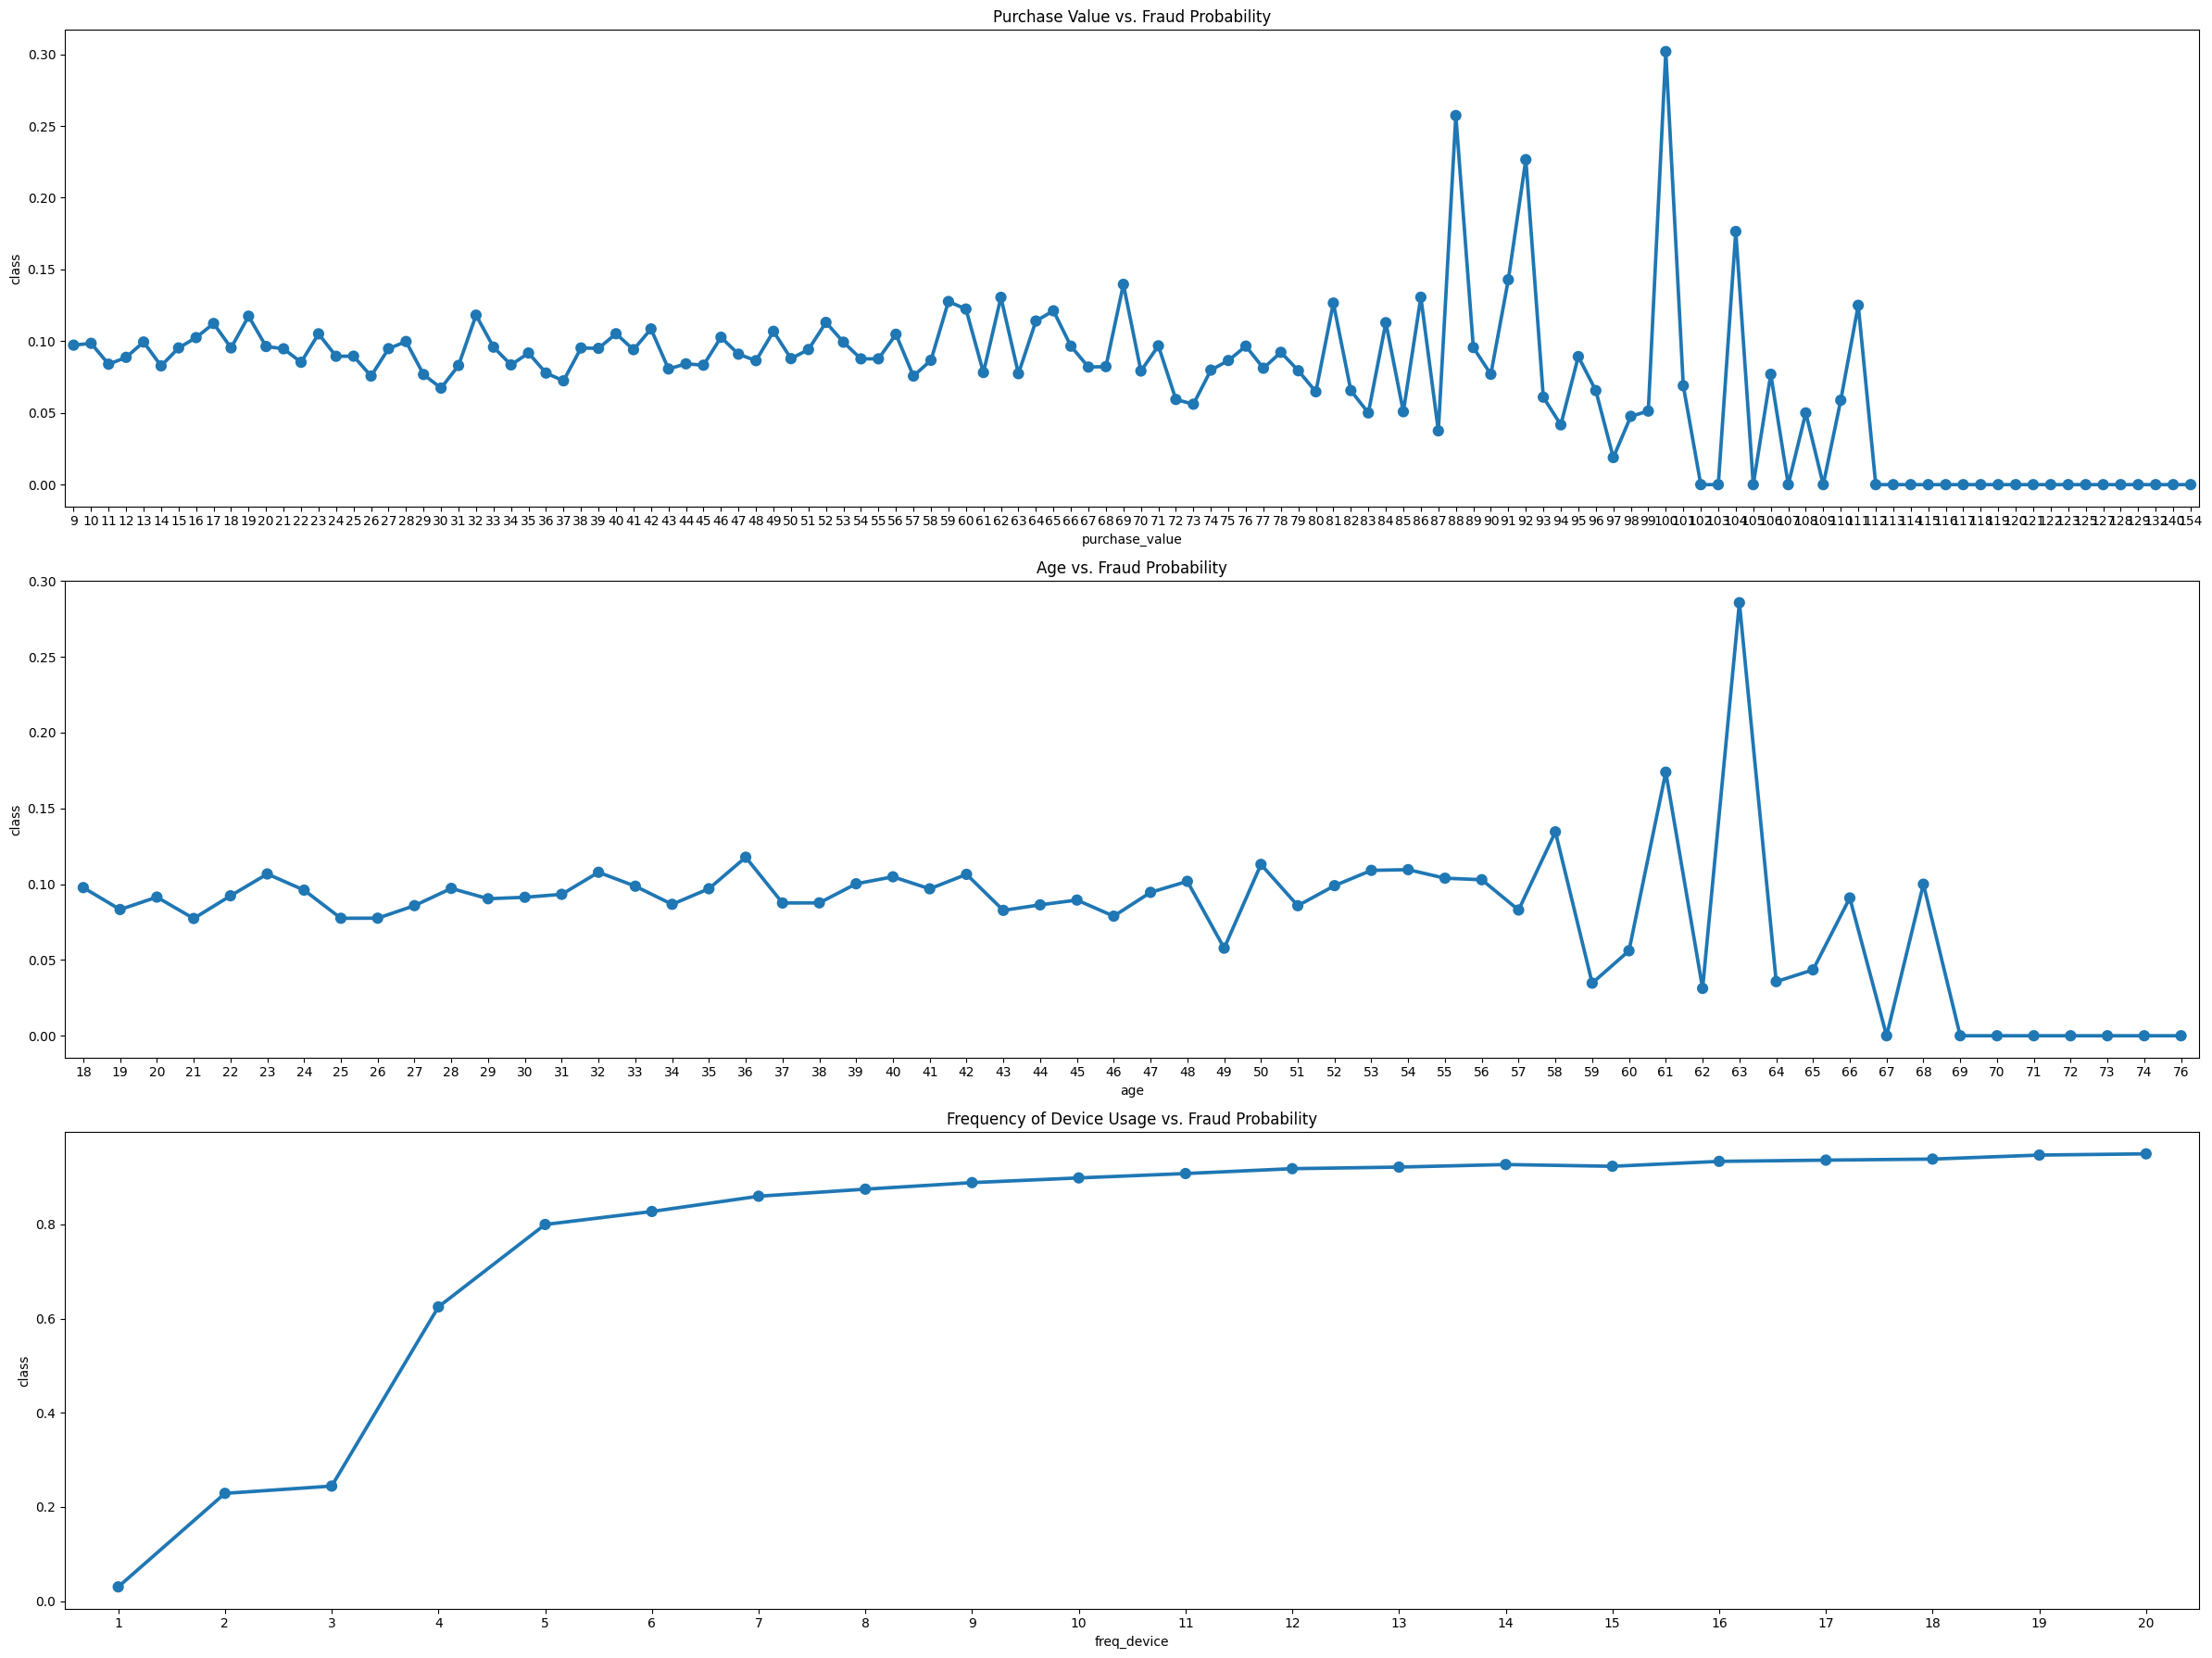

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
f2, ax2 = plt.subplots(3, 1, figsize=(24, 18))

# Plot purchase_value vs. class
sns.pointplot(x="purchase_value", y="class", data=user_info, ci=None, ax=ax2[0])
ax2[0].set_title("Purchase Value vs. Fraud Probability")

# Plot age vs. class
sns.pointplot(x="age", y="class", data=user_info, ci=None, ax=ax2[1])
ax2[1].set_title("Age vs. Fraud Probability")

# Plot freq_device vs. class
sns.pointplot(x="freq_device", y="class", data=user_info, ci=None, ax=ax2[2])
ax2[2].set_title("Frequency of Device Usage vs. Fraud Probability")

# Show the plots
plt.tight_layout()
plt.show()


In [21]:
user_info.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class     IP_country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        Unknown   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   freq_device  
0            1  
1            1  
2           12  
3            1  
4            1

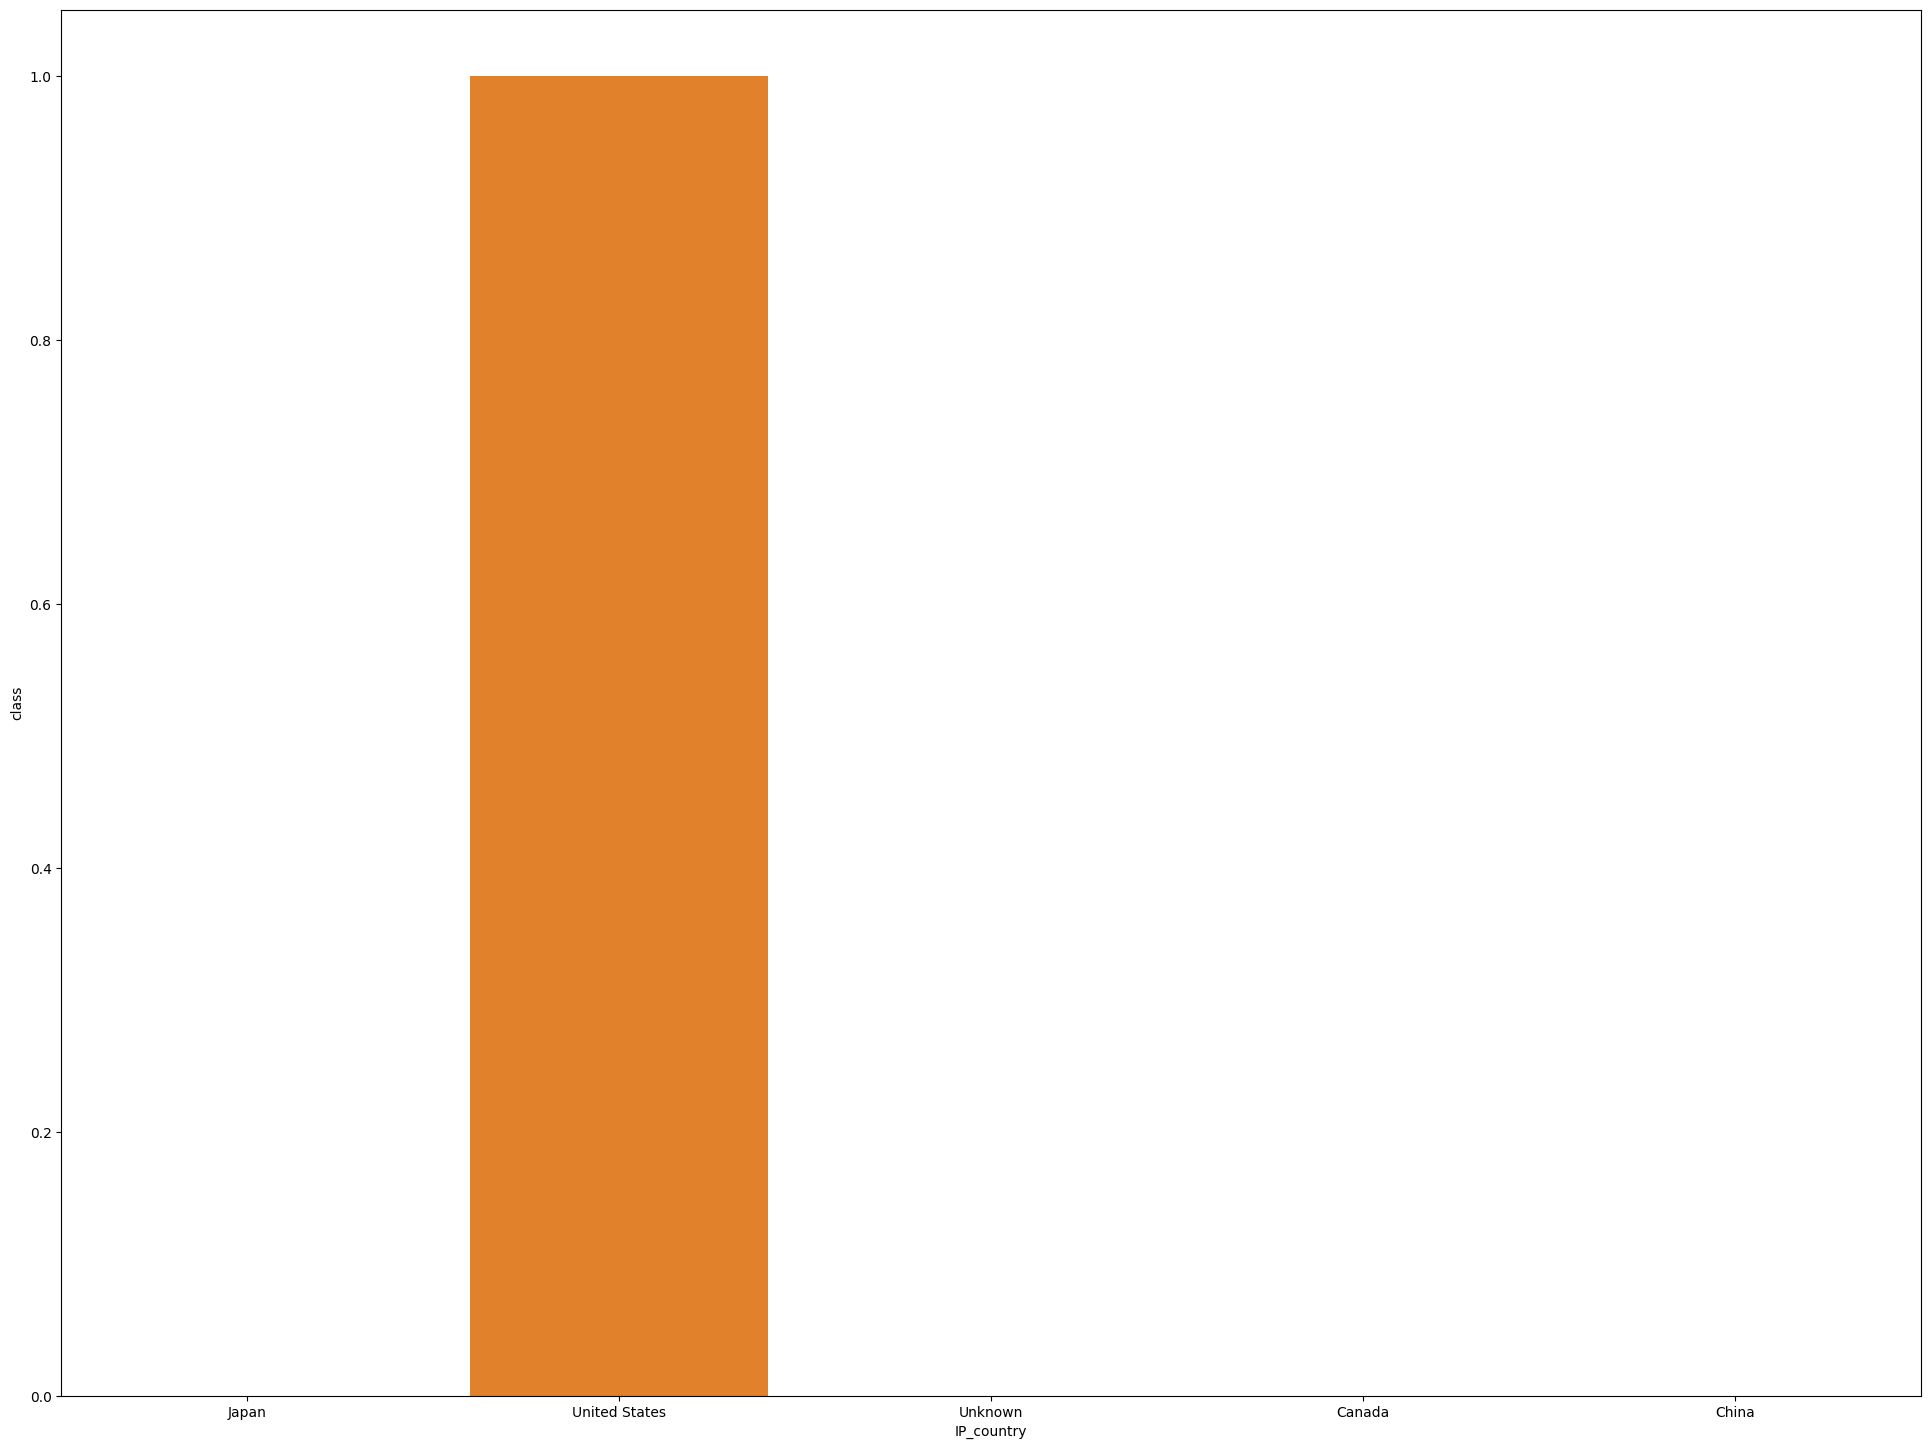

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
f3, ax3 = plt.subplots(1, 1, figsize=(24, 18))

# Plot a stacked bar plot for IP_country vs. class
sns.barplot(x="IP_country", y="class", data=user_info[:10], estimator=sum, ci=None, ax=ax3)

# Show the plot
plt.show()


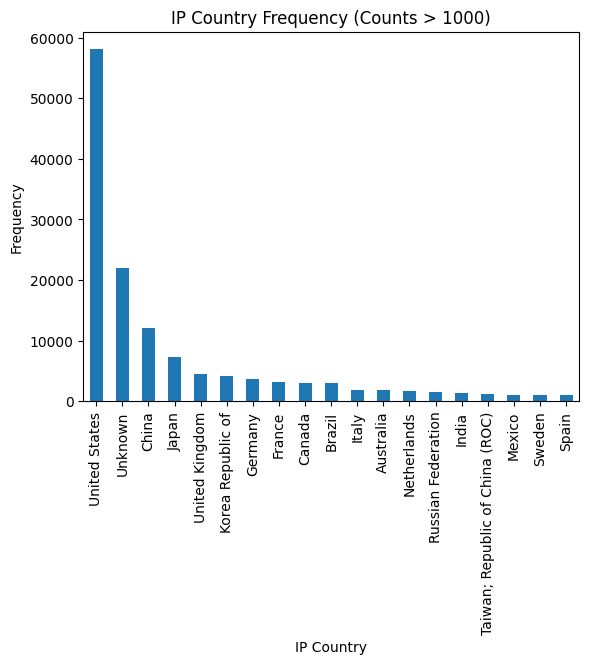

In [23]:
# Filter IP_country value counts where count is greater than 1000
filtered_counts = user_info.IP_country.value_counts()[user_info.IP_country.value_counts() > 1000]

# Plot the filtered counts as a bar plot
filtered_counts.plot(kind="bar")
plt.xlabel("IP Country")
plt.ylabel("Frequency")
plt.title("IP Country Frequency (Counts > 1000)")
plt.show()

In [24]:
user_info.signup_time

0         2015-02-24 22:55:49
1         2015-06-07 20:39:50
2         2015-01-01 18:52:44
3         2015-04-28 21:13:25
4         2015-07-21 07:09:52
                 ...         
151107    2015-01-27 03:03:34
151108    2015-05-15 17:43:29
151109    2015-03-03 23:07:31
151110    2015-07-09 20:06:07
151111    2015-06-10 07:02:20
Name: signup_time, Length: 151112, dtype: object

## Feature engineering

In [25]:
# --- 1 ---
# Categorisation column freq_device
# We see a clear correlation between freq_device and fraudulent activities. We are going to split freq_device into 7 categories
user_info.freq_device = user_info.freq_device.apply(lambda x:
                                                    str(x) if x < 5 else
                                                    "5-10" if x >= 5 and x <= 10 else
                                                    "11-15" if x > 10 and x <= 15 else
                                                    "> 15")

In [26]:
# Convert signup_time and purchase_time to datetime
user_info.signup_time = pd.to_datetime(user_info.signup_time, format='%Y-%m-%d %H:%M:%S')
user_info.purchase_time = pd.to_datetime(user_info.purchase_time, format='%Y-%m-%d %H:%M:%S')

In [27]:
# --- 2 ---
# Column month
user_info["month_purchase"] = user_info.purchase_time.apply(lambda x: calendar.month_name[x.month])

# --- 3 ---
# Column week
user_info["weekday_purchase"] = user_info.purchase_time.apply(lambda x: calendar.day_name[x.weekday()])

# --- 4 ---
# Column hour_of_the_day
user_info["hour_of_the_day"] = user_info.purchase_time.apply(lambda x: x.hour)

# --- 5 ---
# Column seconds_since_signup
user_info["seconds_since_signup"] = (user_info.purchase_time - user_info.signup_time).apply(lambda x: x.total_seconds())


In [28]:
# --- 6 ---
# Column countries_from_device (ie. number of different countries per device_id)
# We flag devices that committed purchases from different countries
country_count = user_info.groupby(by=["device_id", "IP_country"]).count().reset_index()
country_count = pd.DataFrame(country_count.groupby(by="device_id").count().IP_country)
user_info = user_info.merge(country_count, left_on="device_id", right_index=True)
user_info.rename(columns={"IP_country_x": "IP_country", "IP_country_y": "countries_from_device"}, inplace=True)

In [29]:
user_info.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class     IP_country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0        Unknown   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

  freq_device month_purchase weekday_purchase  hour_of_the_day  \
0           1          April         Saturday                2   
1           1           June           Monday                1   
2       11-15        January         Thursday               18   
3           1            May           Monday               13   
4           1      September        Wednesday               18   

   seconds_since_signup  countries_from_device  
0             4506682.0                      1  
1               17944.0                      1  
2                   1.0                      1  
3              492085.0                      1  
4             4361461.0                      1

In [30]:
# Step 1: Calculate the proportion of fraudulent transactions for each country
fraud_rate_by_country = user_info.groupby('IP_country')['class'].mean().sort_values(ascending=False)

# Step 2: Categorize countries based on their fraud rates into risk levels
risk_levels = pd.cut(fraud_rate_by_country, bins=[-np.inf, 0.01, 0.05, 0.25, np.inf], labels=['Low risk', 'Medium risk', 'High risk', 'Very high risk'])

# Combine the results into a DataFrame
risk_country = pd.DataFrame({'fraud_rate': fraud_rate_by_country, 'risk_level': risk_levels})
risk_country

fraud_rate      risk_level
IP_country                                                      
Turkmenistan                            1.000000  Very high risk
Namibia                                 0.434783  Very high risk
Sri Lanka                               0.419355  Very high risk
Luxembourg                              0.388889  Very high risk
Virgin Islands (U.S.)                   0.333333  Very high risk
...                                          ...             ...
Monaco                                  0.000000        Low risk
Congo The Democratic Republic of The    0.000000        Low risk
Congo                                   0.000000        Low risk
Cayman Islands                          0.000000        Low risk
Jamaica                                 0.000000        Low risk

[182 rows x 2 columns]

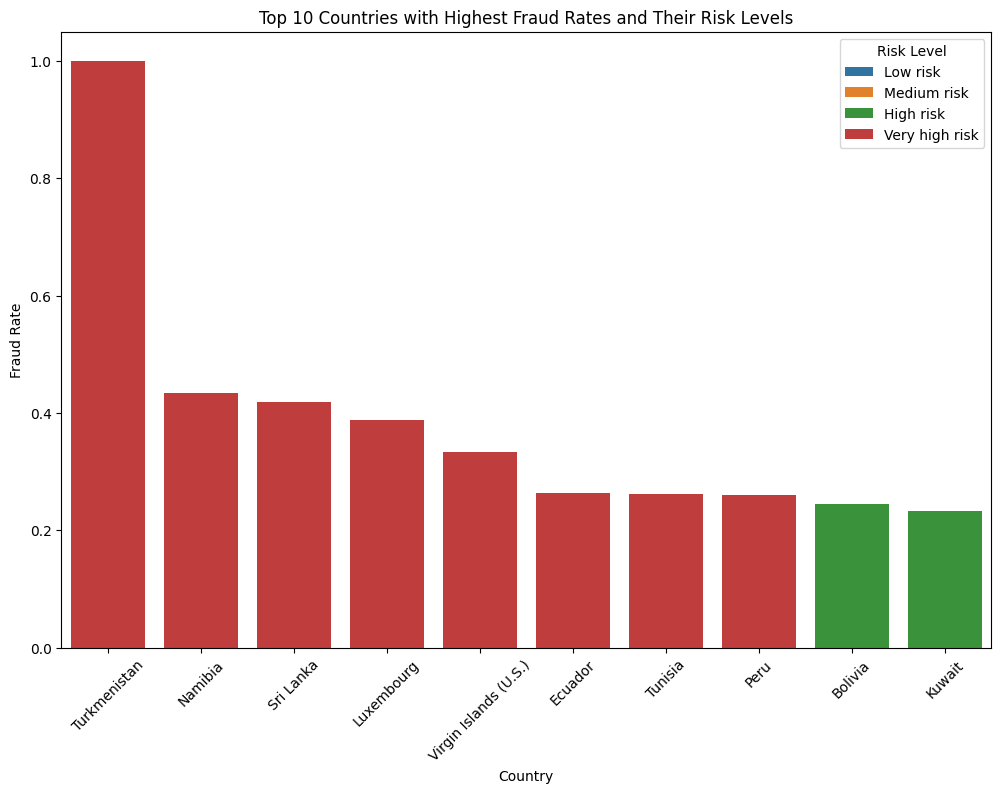

In [31]:
top_10_countries = risk_country.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.index, y='fraud_rate', data=top_10_countries, hue='risk_level', dodge=False)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Fraud Rate')
plt.title('Top 10 Countries with Highest Fraud Rates and Their Risk Levels')
plt.legend(title='Risk Level')
plt.show()


In [32]:
user_info = user_info.merge(risk_country, left_on="IP_country", right_index=True)


In [33]:
# --- 8 ---
# Column "quick_purchase" : categorise time between sign_up and purchase
user_info["quick_purchase"] = user_info.seconds_since_signup.apply(lambda x: 1 if x < 30 else 0)

# --- 9 ---
# Column freq_same_purchase : indicates how many times a given device_id purchased an item of the same value
duplicate = user_info.duplicated(subset=["purchase_value", "device_id"], keep=False)
duplicate = pd.concat([user_info.loc[:, ["purchase_value", "device_id"]], duplicate], axis=1)
duplicate = duplicate.groupby(by=["device_id", "purchase_value"]).sum()
duplicate["freq_same_purchase"] = duplicate[0].apply(lambda x:
                                                      x if x < 5 else
                                                      "5-10" if x <= 10 else
                                                      "11-15" if x <= 15 else
                                                      ">15"
                                                      )
user_info = user_info.merge(duplicate.drop(0, axis=1), left_on=["device_id", "purchase_value"], right_index=True)

In [34]:
# --- 10 ----
# age categorisation
user_info["age_category"] = user_info.age.apply(lambda x:
                                                "< 40" if x < 40 else
                                                "40 - 49" if x < 50 else
                                                "50 -59" if x < 60 else
                                                "60 - 69" if x < 70 else
                                                " > 70")



In [35]:

# ---- 11 ----
# Hour of the day categorisation
user_info["period_of_the_day"] = user_info.hour_of_the_day.apply(lambda x:
                                                                 "late night" if x < 4 else
                                                                 "early morning" if x < 8 else
                                                                 "morning" if x < 12 else
                                                                 "early arvo" if x < 16 else
                                                                 "arvo" if x < 20 else
                                                                 "evening"
                                                                 )

In [36]:
# ---- 12 -----
# First_purchase 
#this cell took long time 
user_info["first_purchase"] = user_info.apply(lambda x : 
                                         1 if x.purchase_time == user_info.purchase_time[user_info.device_id == x.device_id].min() else 0,
                                         axis =1)

user_info.first_purchase.to_csv("/kaggle/working/datasets_fraud/Series_first_purchase.csv",index =False)



In [37]:
user_info["first_purchase"] = pd.read_csv("/kaggle/working/datasets_fraud/Series_first_purchase.csv" )

user_info.to_csv("/kaggle/working/datasets_fraud/data_with_first_feature_eng.csv")

In [38]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import datetime
import calendar
import warnings

In [39]:
user_info=pd.read_csv("/kaggle/input/fraud-cleaned/datasets_fraud/data_with_first_feature_eng.csv")

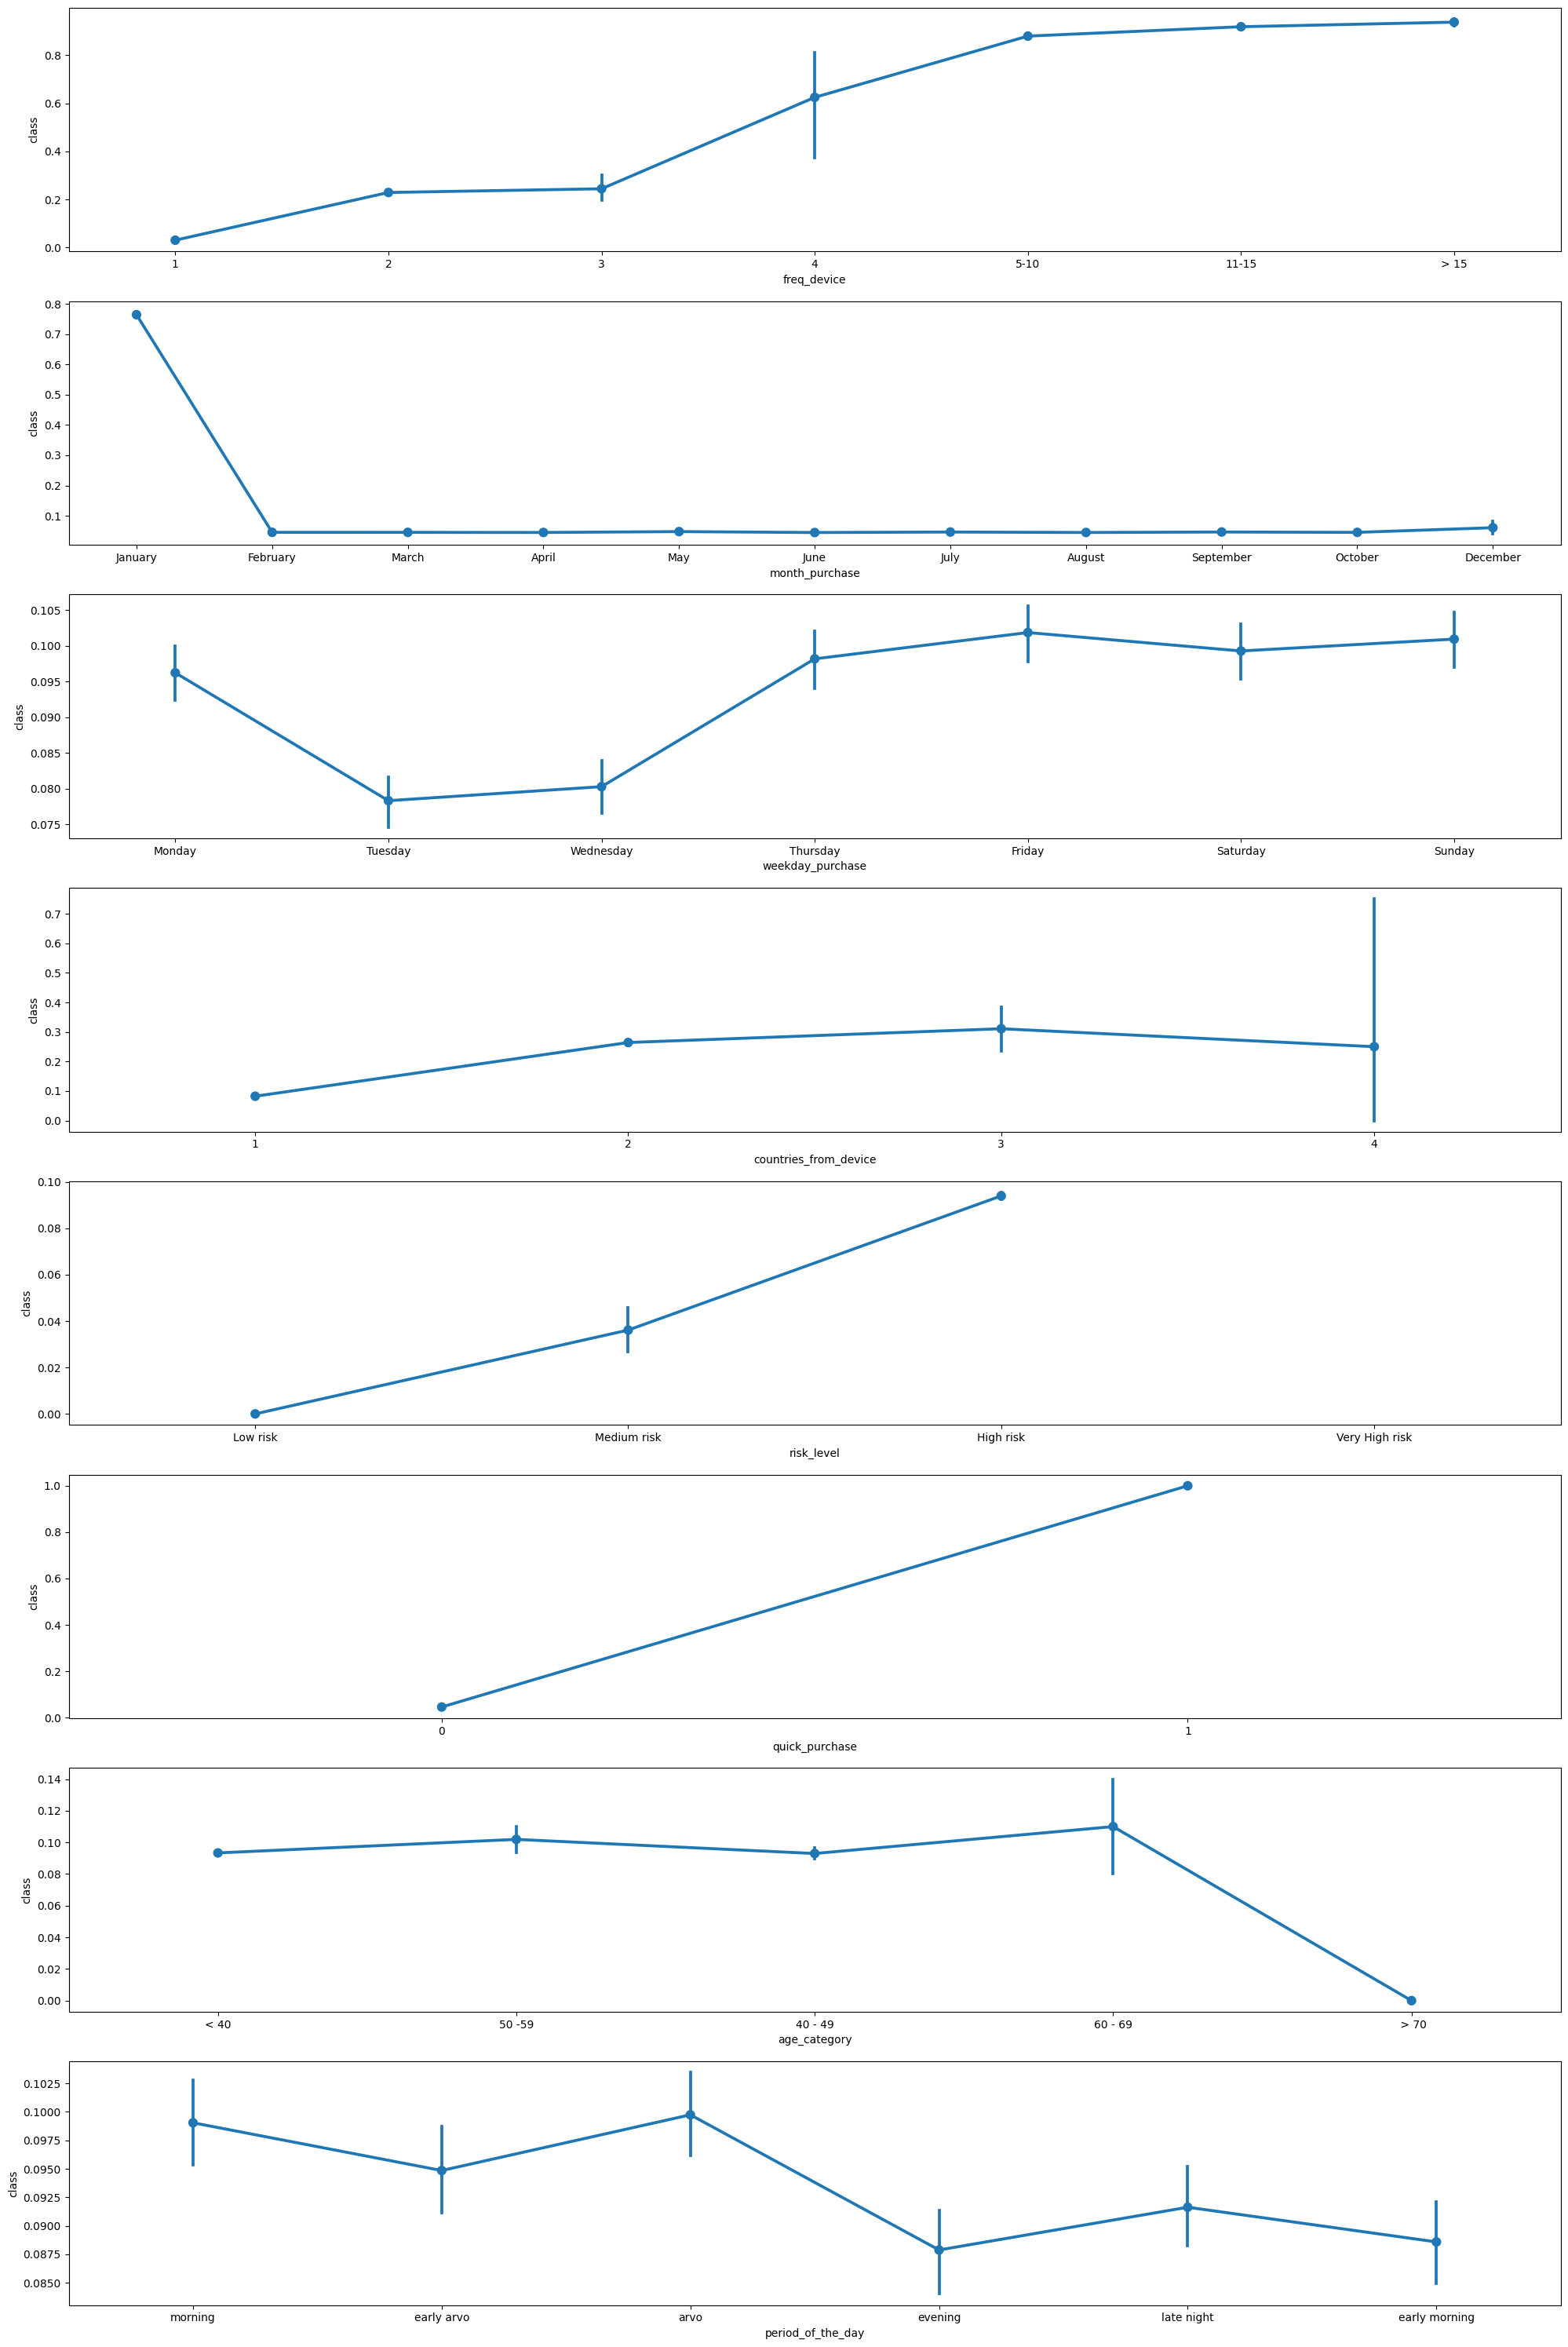

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

liste_col = ["freq_device", "month_purchase", "weekday_purchase",
             "countries_from_device", "risk_level", "quick_purchase",
             "age_category", "period_of_the_day"]

# Define the order for categorical variables
param_order = {
    "freq_device": ["1", "2", "3", "4", "5-10", "11-15", "> 15"],
    "month_purchase": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "December"],
    "weekday_purchase": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "risk_level": ["Low risk", "Medium risk", "High risk", "Very High risk"],
    "period_of_the_day": ["morning", "early arvo", "arvo", "evening", "late night", "early morning"]
}

# Create subplots
fig, axes = plt.subplots(len(liste_col), 1, figsize=(20, 30))

# Iterate through each column and create a pointplot
for i, col in enumerate(liste_col):
    sns.pointplot(x=col, y="class", data=user_info, order=param_order.get(col), ax=axes[i])
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


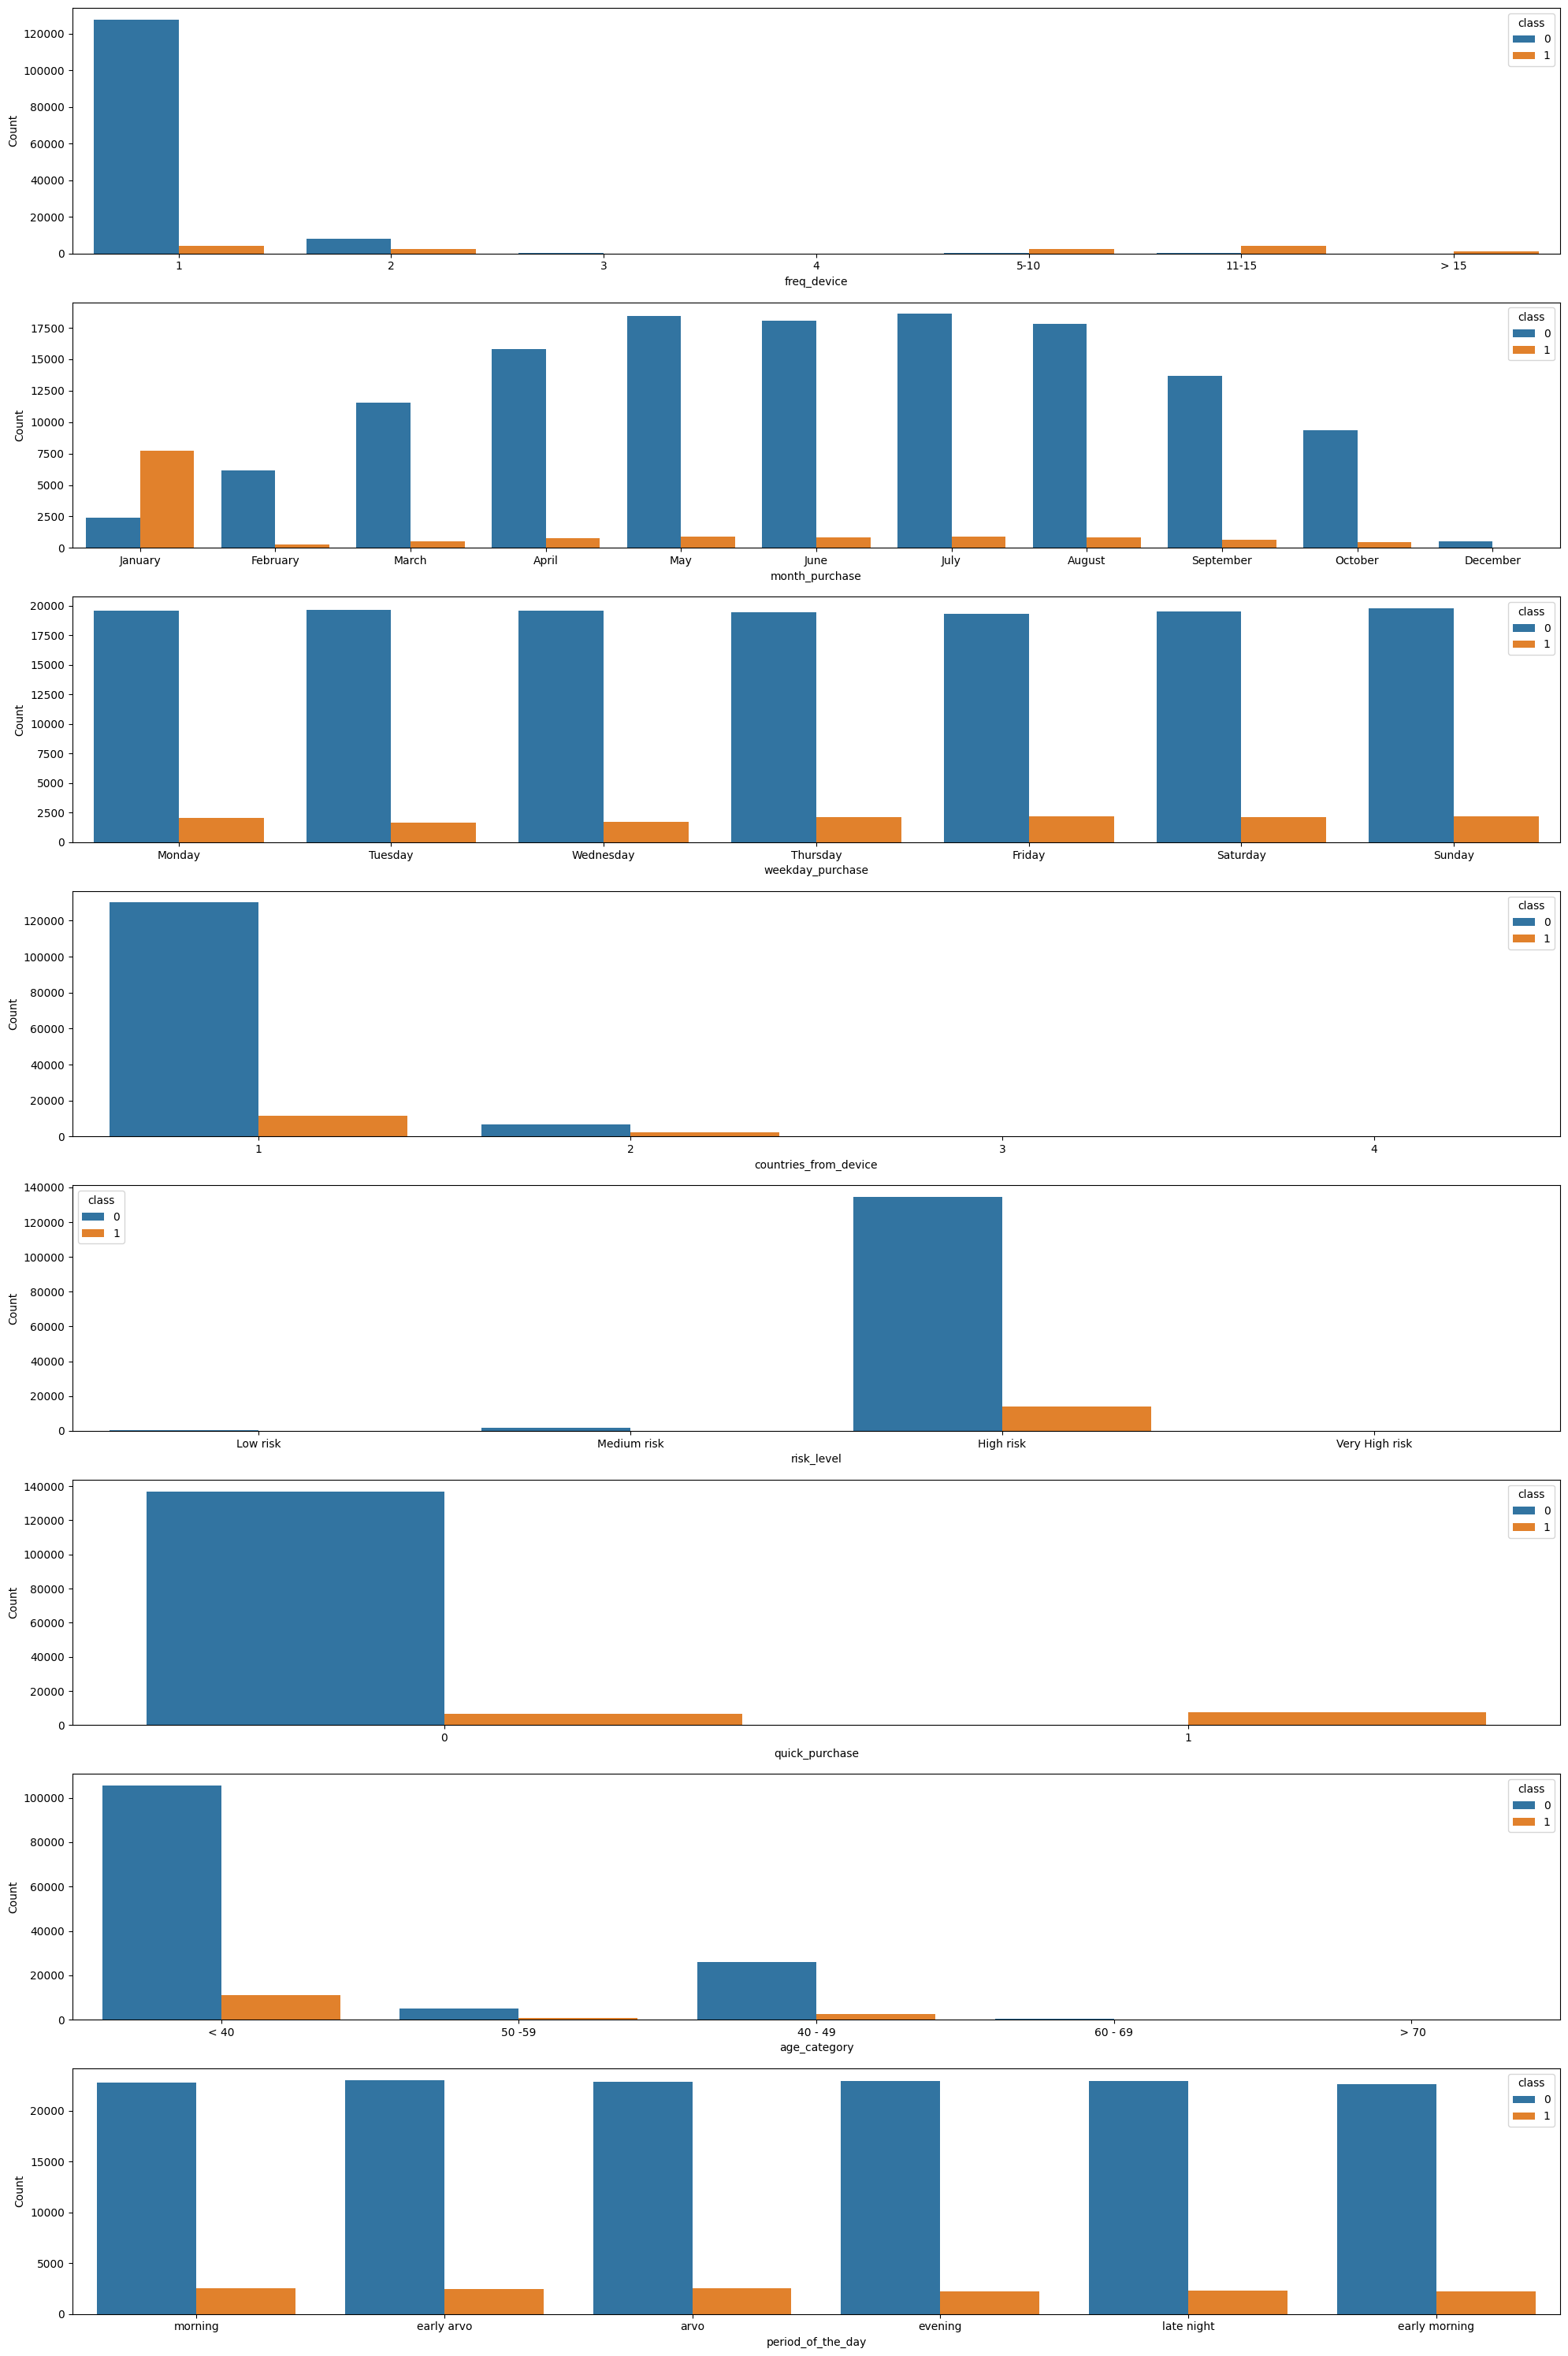

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns and their order
liste_col = ["freq_device", "month_purchase", "weekday_purchase",
             "countries_from_device", "risk_level", "quick_purchase",
             "age_category", "period_of_the_day"]

# Define the order for categorical variables
param_order = {
    "freq_device": ["1", "2", "3", "4", "5-10", "11-15", "> 15"],
    "month_purchase": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "December"],
    "weekday_purchase": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "risk_level": ["Low risk", "Medium risk", "High risk", "Very High risk"],
    "period_of_the_day": ["morning", "early arvo", "arvo", "evening", "late night", "early morning"]
}

# Create subplots
fig, axes = plt.subplots(len(liste_col), 1, figsize=(20, 30))

# Iterate through each column and create a stacked bar plot
for i, col in enumerate(liste_col):
    sns.countplot(x=col, hue="class", data=user_info, order=param_order.get(col), ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='class')

plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Function for moving a column to the recycling dataset
def to_recycle_bin(column):
    recycle_ds[column] = user_info[column]
    user_info.drop(column, axis=1, inplace=True)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', 500)

# Define the list of columns to remove
columns_to_remove = ["user_id", "signup_time", "purchase_time", "device_id", "ip_address", "IP_country", "hour_of_the_day", "seconds_since_signup", "age"]

# Initialize the recycling dataset
recycle_ds = pd.DataFrame()

# Loop through the columns and move them to the recycling dataset
for column in columns_to_remove:
    to_recycle_bin(column)

# Drop rows with missing values from the user_info dataset
user_info.dropna(inplace=True)

In [43]:
user_info["class"].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

## Logistic regression

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Data preprocessing
features = pd.get_dummies(user_info.drop("class", axis=1), drop_first=True)
target = user_info["class"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    random_state=42,
                                                    stratify=target,
                                                    test_size=0.25)

# Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Printing scores
train_score = logistic_regression.score(X_train, y_train)
test_score = logistic_regression.score(X_test, y_test)
print("Train Score:", round(train_score * 100, 2), "%")
print("Test Score:", round(test_score * 100, 2), "%")

Train Score: 95.68 %
Test Score: 95.61 %


Predicted fraud count: 3413 with a threshold of 22.0 % Test Score with threshold: 93.66 %


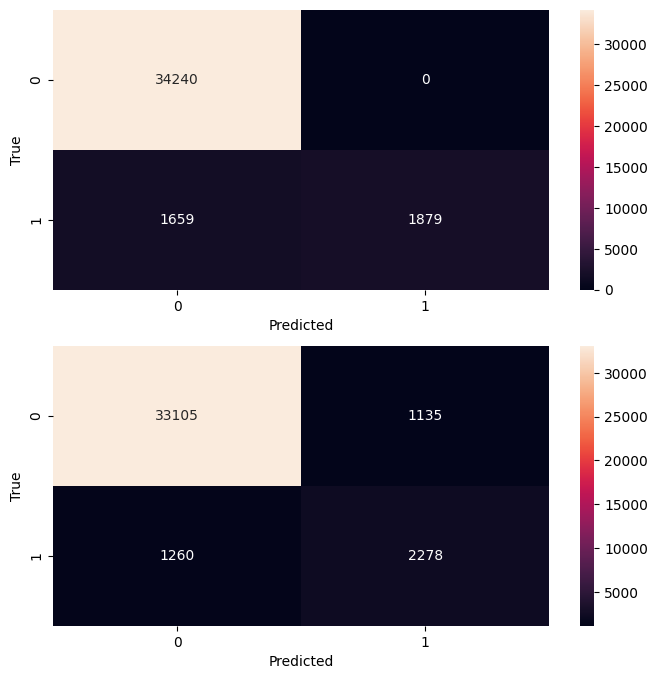

In [45]:
# Setting up probability threshold
prob_threshold = 0.22

# Predicting probabilities and applying threshold
probabilities = pd.DataFrame(logistic_regression.predict_proba(X_test), columns=["prob_no_fraud", "prob_fraud"]).drop("prob_no_fraud", axis=1)
predictions = probabilities.prob_fraud.apply(lambda x: 0 if x < prob_threshold else 1)

# Calculating score with threshold
threshold_score = np.mean(predictions.reset_index(drop=True) == y_test.reset_index(drop=True))

# Printing results with threshold
print("Predicted fraud count:", sum(predictions),
      "with a threshold of", prob_threshold * 100, "%",
      "Test Score with threshold:", round(threshold_score * 100, 2), "%")

# Confusion matrix
f, ax = plt.subplots(2, 1, figsize=(8, 8))

# Confusion matrix with default threshold (50%)
cm_default = confusion_matrix(y_test, logistic_regression.predict(X_test))
sns.heatmap(cm_default, annot=True, fmt="d", ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Confusion matrix with personalized threshold
cm_threshold = confusion_matrix(y_test, predictions)
sns.heatmap(cm_threshold, annot=True, fmt="d", ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()


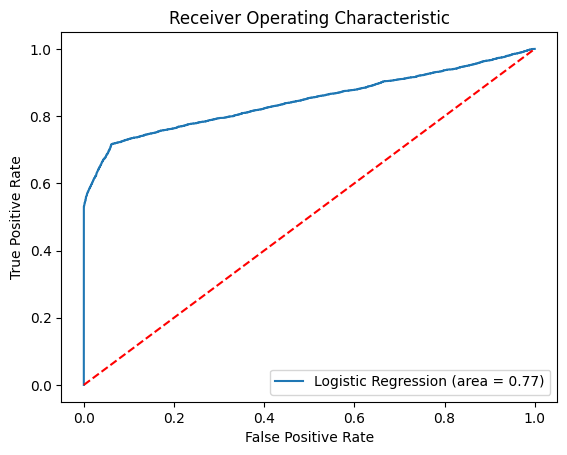

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [47]:
import joblib
from sklearn.metrics import accuracy_score
# Save the model to a file
joblib.dump(logistic_regression, 'ecommerce_log_reg.pkl')

['ecommerce_log_reg.pkl']

In [48]:

#  load the model from the file
loaded_model = joblib.load('ecommerce_log_reg.pkl')

# use the loaded model to make predictions
predicted_classes = loaded_model.predict(X_test)

In [49]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy) 

Accuracy: 0.9560855524379268


## Logistic regression with SMOTE

In [50]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define the resampling method and the ML model
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

# Define the pipeline with resampling and the model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Fit the pipeline onto the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predicted = pipeline.predict(X_test)

# Print the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
print('Confusion matrix:\n', confusion_matrix(y_test, predicted))

# Calculate and print accuracy scores
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     41177
           1       0.82      0.58      0.68      4157

    accuracy                           0.95     45334
   macro avg       0.89      0.78      0.83     45334
weighted avg       0.95      0.95      0.95     45334

Confusion matrix:
 [[40648   529]
 [ 1735  2422]]
Training Accuracy: 0.9468982208020571
Test Accuracy: 0.9500595579476773


In [51]:
# Save the resampling method and the model separately
joblib.dump(resampling, 'resampling_model.pkl')
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [52]:
# Load the resampling method and the model
resampling = joblib.load('resampling_model.pkl')
model = joblib.load('logistic_regression_model.pkl')

# Recreate the pipeline
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9468982208020571
Test Accuracy: 0.9500595579476773


In [53]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model = RandomForestClassifier(random_state=5, n_estimators=20)
Random_forest_model.fit(X_train, y_train)
train_accuracy = Random_forest_model.score(X_train, y_train)
test_accuracy = Random_forest_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9955472782620205
Test Accuracy: 0.957757974147439


In [54]:
joblib.dump(Random_forest_model, 'ecommerce_Random_forest_model.pkl')

['ecommerce_Random_forest_model.pkl']

# fraud in Credit Card

## DataFrame Description:
* ## Time: Timestamp of the transaction.
* ## V1-V28: Features generated by PCA transformation to protect user identities and sensitive information.
* ## Amount: Transaction amount.
* ## Class: Class label indicating whether the transaction is fraudulent (1) or not (0).

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [57]:
# first 5 rows of the dataset
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [58]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [59]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [60]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [61]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [62]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [63]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [64]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [65]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9       V10       V11       V12  \
Class                                                                         
0      0.002419  0.009637 -0.000987  0.004467  0.009824 -0.006576  0.010832   
1     -1.397737 -5.568731  0.570636 -2.581123 -5.676883  3.800173 -6.259393   

            V13       V14       V15       V16       V17       V18       V19  \
Class                                                                         
0      0.000189  0.012064  0.000161  0.007164  0.011535  0.003887 -0.001178   
1     -0.109334 -6.971723 -0.092929 -4.139946 -6.665836 -2.246308  0.680659   

            V20       V21       V22       V23       V24       V25       V26  \
Class                                                                         
0     -0.000644 -0.001235 -0.000024  0.000070  0.000182 -0.000072 -0.000089   
1      0.372319  0.713588  0.014049 -0.040308 -0.105130  0.041449  0.051648   

            V27       V28      Amount  
Class                                  
0     -0.000295 -0.000131   88.291022  
1      0.170575  0.075667  122.211321

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [66]:
legit_sample = legit.sample(n=492)

In [67]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [68]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
147509   88628.0  1.720751 -0.726169 -0.808672  0.279894  0.227486  1.423688   
51130    44808.0 -7.390234 -2.362138 -1.601340  2.305168  1.322983  0.388169   
259545  159165.0 -0.704958  0.536297  1.287091 -0.470781  0.451874  0.735918   
154580  102075.0  2.064449 -0.064035 -0.984886  0.199525  0.189043 -0.400122   
174197  121814.0  2.138549 -0.873120 -1.334446 -0.965266 -0.409708 -0.486848   

              V7        V8        V9       V10       V11       V12       V13  \
147509 -0.622403  0.436983  1.080781 -0.210653  1.046919  1.741840  0.587748   
51130  -1.871498 -5.730326 -0.277777  0.920010  1.855357  1.344497 -0.163115   
259545  0.037005  0.310093 -0.080568 -1.080879  0.726941  0.597830  1.072433   
154580 -0.198939 -0.179360  1.895010 -0.295306 -0.003389 -2.526420  1.497146   
174197 -0.514899 -0.057907 -0.476144  0.925710  0.829271 -0.170288 -0.915498   

             V14       V15       V16       V17       V18       V19       V20  \
147509 -0.042244 -0.093882 -1.009232  0.230936 -0.923577 -0.772597 -0.157154   
51130   0.995140  1.300396 -0.312151  0.379460 -0.736587  0.419206 -1.389719   
259545 -1.784209  0.210283  1.232057 -0.048924  1.383463  0.459825  0.175846   
154580  1.805727  0.277094  0.521535  0.045203 -0.393650 -0.070260 -0.204283   
174197  0.227792 -1.017833  0.794507  0.293570 -1.378713  1.118465 -0.054536   

             V21       V22       V23       V24       V25       V26       V27  \
147509  0.354501  1.339983  0.006461 -1.346720 -0.088529 -0.019991  0.070680   
51130  -3.144408  1.454596 -0.719147 -0.099626 -0.343214 -0.397844 -2.403415   
259545 -0.047403 -0.157534 -0.240215  0.028257  0.373450  0.529886 -0.172553   
154580 -0.637231 -1.674052  0.545325  0.144882 -0.695791 -0.020314 -0.101163   
174197  0.019041 -0.016538  0.261518  0.683928 -0.138893 -0.376241 -0.045343   

             V28  Amount  Class  
147509 -0.059333   68.25      0  
51130   1.671146    5.92      0  
259545 -0.004416   51.60      0  
154580 -0.051533   14.97      0  
174197 -0.063591   25.00      0

In [69]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [70]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
147509   88628.0  1.720751 -0.726169 -0.808672  0.279894  0.227486  1.423688   
51130    44808.0 -7.390234 -2.362138 -1.601340  2.305168  1.322983  0.388169   
259545  159165.0 -0.704958  0.536297  1.287091 -0.470781  0.451874  0.735918   
154580  102075.0  2.064449 -0.064035 -0.984886  0.199525  0.189043 -0.400122   
174197  121814.0  2.138549 -0.873120 -1.334446 -0.965266 -0.409708 -0.486848   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [71]:
print(Y)

147509    0
51130     0
259545    0
154580    0
174197    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [74]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


## Model Training

In [75]:
model = LogisticRegression()

In [76]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [77]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [78]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9174078780177891


In [79]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [80]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


In [81]:
import pickle

# Save the model to a file
with open('credit_card_log_reg.pkl', 'wb') as file:
    pickle.dump(model, file)


# Malicious URL Detection

## DataFrame Description:

*This DataFrame contains website URLs along with their corresponding types.*

*  url: The URL of the website.
*  type: The type of website, categorized into various types such as phishing, benign, defacement, etc.

In [82]:
!pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 1.1 MB/s eta 0:00:00


In [83]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os


In [84]:
df=pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv')

print(df.shape)
df.head()

(651191, 2)


url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [85]:
df["type"].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

## Feature Engineering


In [86]:
import re

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
print(df.head())

                                                 url        type  use_of_ip
0                                   br-icloud.com.br    phishing          0
1                mp3raid.com/music/krizz_kaliko.html      benign          0
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0


In [87]:
df.use_of_ip.value_counts()

use_of_ip
0    643898
1      7293
Name: count, dtype: int64

In [88]:
from urllib.parse import urlparse
import re

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  
0             0  
1             0  
2             0  
3             1  
4             1

In [89]:
print(df.url.iloc[3])
abnormal_url(df["url"][3])

http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15


1

In [90]:
df.abnormal_url.value_counts()

abnormal_url
0    463185
1    188006
Name: count, dtype: int64

In [91]:
!pip install googlesearch-python

  Preparing metadata (setup.py) ... - \ done
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4209 sha256=49a1784f0bb0fbd96b1c86da041f6e75660e2c27fa031d4de8863f3733bccb46
  Stored in directory: /root/.cache/pip/wheels/98/24/e9/6c225502948c629b01cc895f86406819281ef0da385f3eb669
Successfully built googlesearch-python


## Feature engineering

In [92]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  
0             0       2  
1             0       2  
2             0       2  
3             1       3  
4             1       2

In [93]:
df['count.'].value_counts()

count.
2     236038
1     219105
3     129667
4      40227
5       9436
6       5729
7       3570
8       1566
9       1150
10      1114
11       973
12       757
13       505
14       379
15       259
16       144
20       129
17       118
19        88
18        70
0         61
22        24
24        22
21        18
23        10
25         9
36         5
27         4
26         4
35         3
42         3
31         1
37         1
34         1
28         1
Name: count, dtype: int64

In [94]:
import re
from urllib.parse import urlparse

# Count occurrences of 'www'
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
print(df['count-www'].value_counts())
df.head()

count-www
0    525525
1    124178
2      1422
3        58
4         7
5         1
Name: count, dtype: int64


url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  
0             0       2          0  
1             0       2          0  
2             0       2          0  
3             1       3          1  
4             1       2          0

In [95]:
# Count occurrences of '@'
df['count@'] = df['url'].apply(lambda i: i.count('@'))
print(df['count@'].value_counts())
df.tail()

count@
0     649845
1       1290
2         40
3          9
4          3
10         3
6          1
Name: count, dtype: int64


url      type  use_of_ip  \
651186        xbox360.ign.com/objects/850/850402.html  phishing          0   
651187   games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing          0   
651188     www.gamespot.com/xbox360/action/deadspace/  phishing          0   
651189  en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing          0   
651190      www.angelfire.com/goth/devilmaycrytonite/  phishing          0   

        abnormal_url  count.  count-www  count@  
651186             0       3          0       0  
651187             0       2          0       0  
651188             0       2          1       0  
651189             0       2          0       0  
651190             0       2          1       0

In [96]:
# Count number of directories in the path component
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
print(df["url"][3])
print(no_of_dir(df["url"][3]))

http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15
1


In [97]:
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
print(df['count_dir'].value_counts())
df.head()

count_dir
1     208263
2     185322
3     120164
4      53510
5      35379
0      23046
6      14204
7       5671
8       2326
10      1362
9        966
11       343
13       176
12       165
14       161
16        50
15        32
22        12
18        10
17         9
21         5
19         3
24         2
23         2
27         2
39         1
28         1
25         1
20         1
32         1
34         1
Name: count, dtype: int64


url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  
0             0       2          0       0          0  
1             0       2          0       0          2  
2             0       2          0       0          3  
3             1       3          1       0          1  
4             1       2          0       0          1

In [98]:
# Count occurrences of '//'
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
print(df["url"][3])
print(no_of_embed(df["url"][3]))

http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15
0


In [99]:
df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))
print(df['count_embed_domain'].value_counts())
df.head()

count_embed_domain
0    650205
1       974
2        12
Name: count, dtype: int64


url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  count_embed_domain  
0             0       2          0       0          0                   0  
1             0       2          0       0          2                   0  
2             0       2          0       0          3                   0  
3             1       3          1       0          1                   0  
4             1       2          0       0          1                   0

In [100]:
# Check for URL shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

print(df['short_url'].value_counts())
df.head()

short_url
0    611436
1     39755
Name: count, dtype: int64


url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  count_embed_domain  \
0             0       2          0       0          0                   0   
1             0       2          0       0          2                   0   
2             0       2          0       0          3                   0   
3             1       3          1       0          1                   0   
4             1       2          0       0          1                   0   

   short_url  
0          0  
1          0  
2          0  
3          0  
4          0

In [101]:
# Count occurrences of 'https'
df['count-https'] = df['url'].apply(lambda i: i.count('https'))

# Count occurrences of 'http'
df['count-http'] = df['url'].apply(lambda i: i.count('http'))

# Count occurrences of '%'
df['count%'] = df['url'].apply(lambda i: i.count('%'))

# Count occurrences of '?'
df['count?'] = df['url'].apply(lambda i: i.count('?'))

# Count occurrences of '-'
df['count-'] = df['url'].apply(lambda i: i.count('-'))

# Count occurrences of '='
df['count='] = df['url'].apply(lambda i: i.count('='))

# Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))

# Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

In [102]:
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  count_embed_domain  \
0             0       2          0       0          0                   0   
1             0       2          0       0          2                   0   
2             0       2          0       0          3                   0   
3             1       3          1       0          1                   0   
4             1       2          0       0          1                   0   

   short_url  count-https  count-http  count%  count?  count-  count=  \
0          0            0           0       0       0       1       0   
1          0            0           0       0       0       0       0   
2          0            0           0       0       0       0       0   
3          0            0           1       0       1       1       4   
4          0            0           1       0       1       1       3   

   url_length  hostname_length  
0          16                0  
1          35                0  
2          31                0  
3          88               21  
4         235               23

In [103]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

df.tail()

url      type  use_of_ip  \
651186        xbox360.ign.com/objects/850/850402.html  phishing          0   
651187   games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing          0   
651188     www.gamespot.com/xbox360/action/deadspace/  phishing          0   
651189  en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing          0   
651190      www.angelfire.com/goth/devilmaycrytonite/  phishing          0   

        abnormal_url  count.  count-www  count@  count_dir  \
651186             0       3          0       0          3   
651187             0       2          0       0          4   
651188             0       2          1       0          4   
651189             0       2          0       0          2   
651190             0       2          1       0          3   

        count_embed_domain  short_url  count-https  count-http  count%  \
651186                   0          0            0           0       0   
651187                   0          1            0           0       0   
651188                   0          1            0           0       0   
651189                   0          0            0           0       0   
651190                   0          0            0           0       0   

        count?  count-  count=  url_length  hostname_length  sus_url  
651186       0       0       0          39                0        0  
651187       0       2       0          44                0        0  
651188       0       0       0          42                0        0  
651189       0       0       0          45                0        0  
651190       0       0       0          41                0        0

In [104]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 2.2 MB/s eta 0:00:00


In [105]:
# Importing dependencies
from urllib.parse import urlparse
from tld import get_tld

# First Directory Length
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

print(df.url[8])
print(fd_length(df.url[8]))
print(get_tld(df.url[8], fail_silently=True))

http://www.pashminaonline.com/pure-pashminas
14
com


Explanation:

The URL **http://www.pashminaonline.com/pure-pashminas** has the following structure: protocol://domain/path. The path component of the URL is /pure-pashminas.
After splitting the path by /, the first part is pure-pashminas. The length of the first directory is 14 characters (pure-pashminas).
The top-level domain (TLD) of the URL is com.

In [106]:
# Adding 'fd_length' column
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

# Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i, fail_silently=True))

In [107]:
# Function to calculate length of TLD
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

# Adding 'tld_length' column
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  count_embed_domain  \
0             0       2          0       0          0                   0   
1             0       2          0       0          2                   0   
2             0       2          0       0          3                   0   
3             1       3          1       0          1                   0   
4             1       2          0       0          1                   0   

   short_url  count-https  count-http  count%  count?  count-  count=  \
0          0            0           0       0       0       1       0   
1          0            0           0       0       0       0       0   
2          0            0           0       0       0       0       0   
3          0            0           1       0       1       1       4   
4          0            0           1       0       1       1       3   

   url_length  hostname_length  sus_url  fd_length   tld  tld_length  
0          16                0        0          0  None          -1  
1          35                0        0          5  None          -1  
2          31                0        0          7  None          -1  
3          88               21        0          9    be           2  
4         235               23        0          9   net           3

In [108]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

# Adding a new column 'count-digits' to the DataFrame
df['count-digits'] = df['url'].apply(lambda i: digit_count(i))

In [109]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [110]:
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  count.  count-www  count@  count_dir  count_embed_domain  \
0             0       2          0       0          0                   0   
1             0       2          0       0          2                   0   
2             0       2          0       0          3                   0   
3             1       3          1       0          1                   0   
4             1       2          0       0          1                   0   

   short_url  count-https  count-http  count%  count?  count-  count=  \
0          0            0           0       0       0       1       0   
1          0            0           0       0       0       0       0   
2          0            0           0       0       0       0       0   
3          0            0           1       0       1       1       4   
4          0            0           1       0       1       1       3   

   url_length  hostname_length  sus_url  fd_length   tld  tld_length  \
0          16                0        0          0  None          -1   
1          35                0        0          5  None          -1   
2          31                0        0          7  None          -1   
3          88               21        0          9    be           2   
4         235               23        0          9   net           3   

   count-digits  count-letters  
0             0             13  
1             1             29  
2             1             25  
3             7             63  
4            22            199

In [111]:
df = df.drop("tld", axis=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  object
 2   use_of_ip           651191 non-null  int64 
 3   abnormal_url        651191 non-null  int64 
 4   count.              651191 non-null  int64 
 5   count-www           651191 non-null  int64 
 6   count@              651191 non-null  int64 
 7   count_dir           651191 non-null  int64 
 8   count_embed_domain  651191 non-null  int64 
 9   short_url           651191 non-null  int64 
 10  count-https         651191 non-null  int64 
 11  count-http          651191 non-null  int64 
 12  count%              651191 non-null  int64 
 13  count?              651191 non-null  int64 
 14  count-              651191 non-null  int64 
 15  count=              651191 non-null  int64 
 16  ur

## Model training

In [113]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [114]:
# Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
        'count_dir', 'count_embed_domain', 'short_url', 'count-https',
        'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
        'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
        'count-letters']]

# Target Variable
y = df['type_code']


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [116]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.96      0.99      0.98     19292
           2       0.97      0.90      0.93      6504
           3       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95    

In [117]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


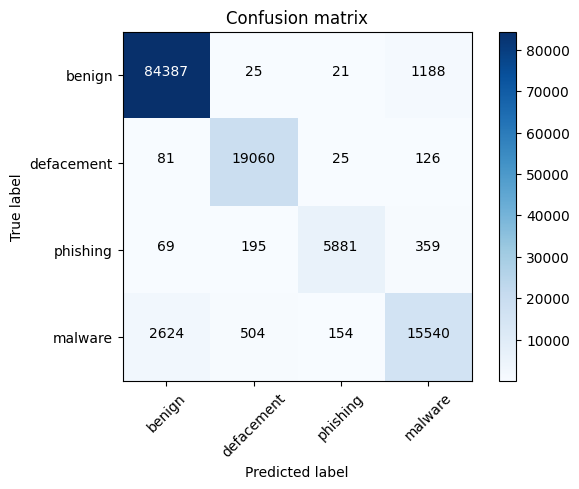

In [118]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

In [119]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([  28,   59, 1002,  504,   70, 1145,   46,  147,  246,  153,  253,
        220,  577,  424, 1057, 1499,  248, 1731,  639, 1178,  774],
      dtype=int32)

In [120]:
lgb_features = lgb_feature.tolist()
lgb_features

[28,
 59,
 1002,
 504,
 70,
 1145,
 46,
 147,
 246,
 153,
 253,
 220,
 577,
 424,
 1057,
 1499,
 248,
 1731,
 639,
 1178,
 774]

In [121]:
import pickle

# Save the model to a file
with open('mul_urls_lgb_model.pkl', 'wb') as f:
    pickle.dump(LGB_C, f)


In [122]:
from sklearn.metrics import accuracy_score
with open('mul_urls_lgb_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

[LightGBM] [Warning] Unknown parameter: silent
Accuracy Score: 0.9587604327428804


In [123]:
model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.97      0.99      0.98     19292
           2       0.98      0.91      0.94      6504
           3       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


Confusion matrix, without normalization


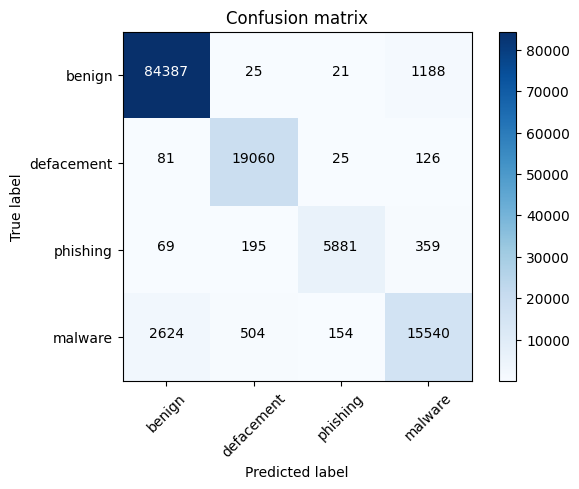

In [124]:
CM=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

In [125]:
import pickle

# Save the model to a file
with open('mul_url_xgb.pkl', 'wb') as f:
    pickle.dump(model, f)

In [126]:
xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85621
           1       0.90      0.97      0.93     19292
           2       0.94      0.78      0.85      6504
           3       0.88      0.74      0.81     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.87      0.89    130239
weighted avg       0.94      0.94      0.93    130239

accuracy:   0.936


Confusion matrix, without normalization


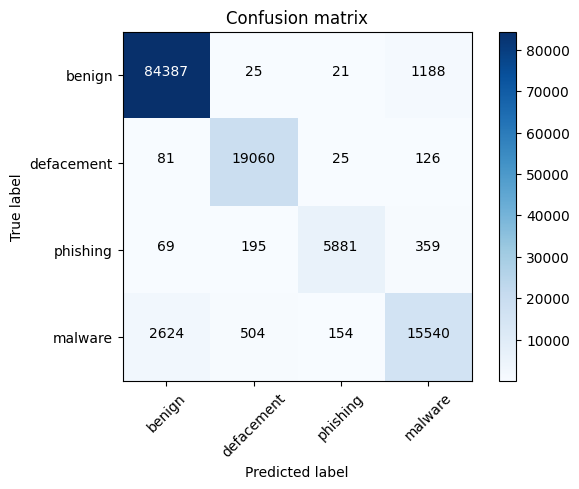

In [128]:
CM=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

In [129]:
import pickle

# Save the model to a file
with open('mul_url_gbdt.pkl', 'wb') as f:
    pickle.dump(gbdt, f)

In [130]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()

In [131]:
print(gbdt_features)
print(xgb_features)
print(lgb_features)


[0.009926778934044034, 0.10043045908976934, 0.04182113208355336, 0.11352396375301177, 0.0005517858543116819, 0.11956566128574823, 0.00021315066701432512, 0.00016525806181322085, 0.023858140176248287, 0.11215288048630734, 0.007177434884427203, 0.019022509893131048, 0.02664861269635726, 0.030952449634066913, 0.05456837123366863, 0.13876059350370692, 0.006699215999167006, 0.04979865932922536, 0.10209550974465895, 0.014028582341962307, 0.028038850347806604]
[0.20144148170948029, 0.009954011999070644, 0.012986901216208935, 0.11788150668144226, 0.011392002925276756, 0.05773505941033363, 0.004404240753501654, 0.004324162844568491, 0.04681212827563286, 0.12727655470371246, 0.02110540308058262, 0.009652560576796532, 0.020793752744793892, 0.014066829346120358, 0.0252049770206213, 0.08040688931941986, 0.026125505566596985, 0.016310779377818108, 0.17117932438850403, 0.010690119117498398, 0.010255822911858559]
[28, 59, 1002, 504, 70, 1145, 46, 147, 246, 153, 253, 220, 577, 424, 1057, 1499, 248, 173

In [132]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features,
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe

features  Gradient Boost feature importances  \
0            use_of_ip                            0.009927   
1         abnormal_url                            0.100430   
2               count.                            0.041821   
3            count-www                            0.113524   
4               count@                            0.000552   
5            count_dir                            0.119566   
6   count_embed_domain                            0.000213   
7            short_url                            0.000165   
8          count-https                            0.023858   
9           count-http                            0.112153   
10              count%                            0.007177   
11              count?                            0.019023   
12              count-                            0.026649   
13              count=                            0.030952   
14          url_length                            0.054568   
15     hostname_length                            0.138761   
16             sus_url                            0.006699   
17           fd_length                            0.049799   
18          tld_length                            0.102096   
19        count-digits                            0.014029   
20       count-letters                            0.028039   

    XG Boost feature importances  LGBM feature importances  
0                       0.201441                        28  
1                       0.009954                        59  
2                       0.012987                      1002  
3                       0.117882                       504  
4                       0.011392                        70  
5                       0.057735                      1145  
6                       0.004404                        46  
7                       0.004324                       147  
8                       0.046812                       246  
9                       0.127277                       153  
10                      0.021105                       253  
11                      0.009653                       220  
12                      0.020794                       577  
13                      0.014067                       424  
14                      0.025205                      1057  
15                      0.080407                      1499  
16                      0.026126                       248  
17                      0.016311                      1731  
18                      0.171179                       639  
19                      0.010690                      1178  
20                      0.010256                       774

In [133]:
# Select only the numeric columns for calculating the mean
numeric_cols = feature_dataframe.columns[1:]  # Exclude the 'features' column
feature_dataframe['mean'] = feature_dataframe[numeric_cols].mean(axis=1)


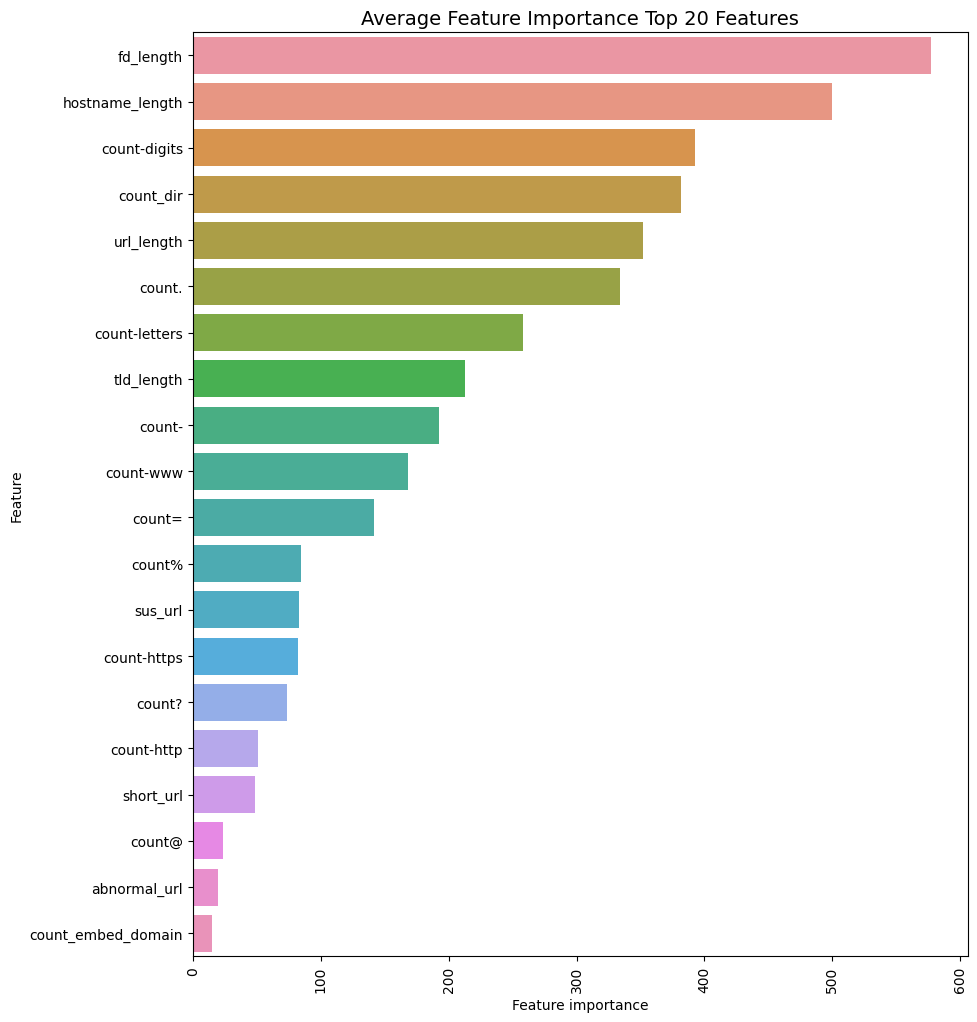

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

#  Bots detection

## DataFrame Description:

***This DataFrame contains data related to Twitter accounts and their attributes, along with a column indicating whether each account is detected as a bot.****

* created_at: Timestamp indicating when the account was created.
* default_profile: Boolean indicating if the account has the default profile settings.
* default_profile_image: Boolean indicating if the account has the default profile image.
* description: Description of the account (bio).
* favourites_count: Number of tweets the account has favorited.
* followers_count: Number of followers of the account.
* friends_count: Number of accounts the account is following.
* geo_enabled: Boolean indicating if the account has enabled geolocation.
* id: Unique identifier for the account.
* lang: Language of the account.
* location: Location specified by the account.
* profile_background_image_url: URL of the background image for the account's profile.
* profile_image_url: URL of the profile image for the account.
* screen_name: Twitter handle of the account.
* statuses_count: Number of tweets made by the account.
* verified: Boolean indicating if the account is verified by Twitter.
* average_tweets_per_day: Average number of tweets per day made by the account.
* account_age_days: Age of the account in days.
* account_type: Type of account.

In [135]:
# Basics
import pandas as pd
import numpy as np
import pickle

# Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [136]:
raw_df = pd.read_csv("/kaggle/input/twitter-bots/twitter_human_bots_dataset.csv", index_col=0)
raw_df.head()

created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11            False                  False   
1  2016-11-09 05:01:30            False                  False   
2  2017-06-17 05:34:27            False                  False   
3  2016-07-21 13:32:25             True                  False   
4  2012-01-15 16:32:35            False                  False   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4        False  787405734442958848   en   
1              860            880        False  796216118331310080   en   
2              172            594         True  875949740503859204   en   
3              517            633         True  756119643622735875   en   
4           753678            116         True           464781334   en   

                  location                      profile_background_image_url  \
0                  unknown  http://abs.twimg.com/images/themes/theme1/bg.png   
1           Estados Unidos  http://abs.twimg.com/images/themes/theme1/bg.png   
2          Los Angeles, CA  http://abs.twimg.com/images/themes/theme1/bg.png   
3           Birmingham, AL                                               NaN   
4  England, United Kingdom  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url      screen_name  \
0  http://pbs.twimg.com/profile_images/7874121826...  best_in_dumbest   
1  http://pbs.twimg.com/profile_images/8023296328...     CJRubinPhoto   
2  http://pbs.twimg.com/profile_images/1278890453...         SVGEGENT   
3  http://pbs.twimg.com/profile_images/1284884924...    TinkerVHELPK5   
4  http://pbs.twimg.com/profile_images/9952566258...    JoleonLescott   

   statuses_count  verified  average_tweets_per_day  account_age_days  \
0           11041     False                   7.870              1403   
1             252     False                   0.183              1379   
2            1001     False                   0.864              1159   
3            1324     False                   0.889              1489   
4            4202      True                   1.339              3138   

  account_type  
0          bot  
1        human  
2        human  
3        human  
4        human

In [137]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37438 entries, 0 to 37437
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    37438 non-null  object 
 1   default_profile               37438 non-null  bool   
 2   default_profile_image         37438 non-null  bool   
 3   description                   30181 non-null  object 
 4   favourites_count              37438 non-null  int64  
 5   followers_count               37438 non-null  int64  
 6   friends_count                 37438 non-null  int64  
 7   geo_enabled                   37438 non-null  bool   
 8   id                            37438 non-null  int64  
 9   lang                          29481 non-null  object 
 10  location                      37434 non-null  object 
 11  profile_background_image_url  32939 non-null  object 
 12  profile_image_url             37437 non-null  object 
 13  screen

In [138]:
# Binary classifications for bots and boolean values
raw_df['bot'] = raw_df['account_type'].apply(lambda x: 1 if x == 'bot' else 0)
raw_df['default_profile'] = raw_df['default_profile'].astype(int)
raw_df['default_profile'] = raw_df['default_profile'].astype(int)
raw_df['default_profile_image'] = raw_df['default_profile_image'].astype(int)
raw_df['geo_enabled'] = raw_df['geo_enabled'].astype(int)
raw_df['verified'] = raw_df['verified'].astype(int)


In [139]:
# datetime conversion
raw_df['created_at'] = pd.to_datetime(raw_df['created_at'])
# hour created
raw_df['hour_created'] = pd.to_datetime(raw_df['created_at']).dt.hour

In [140]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37438 entries, 0 to 37437
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   created_at                    37438 non-null  datetime64[ns]
 1   default_profile               37438 non-null  int64         
 2   default_profile_image         37438 non-null  int64         
 3   description                   30181 non-null  object        
 4   favourites_count              37438 non-null  int64         
 5   followers_count               37438 non-null  int64         
 6   friends_count                 37438 non-null  int64         
 7   geo_enabled                   37438 non-null  int64         
 8   id                            37438 non-null  int64         
 9   lang                          29481 non-null  object        
 10  location                      37434 non-null  object        
 11  profile_background_image_url  329

In [141]:
df = raw_df[['bot', 'screen_name', 'created_at', 'hour_created', 'verified', 'location', 'geo_enabled', 'lang', 
             'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 
             'statuses_count', 'average_tweets_per_day', 'account_age_days']]


In [142]:
del raw_df

In [143]:
# Interesting features to look at: 
df['avg_daily_followers'] = np.round((df['followers_count'] / df['account_age_days']), 3)
df['avg_daily_friends'] = np.round((df['followers_count'] / df['account_age_days']), 3)
df['avg_daily_favorites'] = np.round((df['followers_count'] / df['account_age_days']), 3)

# Log transformations for highly skewed data
df['friends_log'] = np.round(np.log(1 + df['friends_count']), 3)
df['followers_log'] = np.round(np.log(1 + df['followers_count']), 3)
df['favs_log'] = np.round(np.log(1 + df['favourites_count']), 3)
df['avg_daily_tweets_log'] = np.round(np.log(1+ df['average_tweets_per_day']), 3)

# Possible interactive features
df['network'] = np.round(df['friends_log'] * df['followers_log'], 3)
df['tweet_to_followers'] = np.round(np.log( 1 + df['statuses_count']) * np.log(1+ df['followers_count']), 3)

# Log-transformed daily acquisition metrics for dist. plots
df['follower_acq_rate'] = np.round(np.log(1 + (df['followers_count'] / df['account_age_days'])), 3)
df['friends_acq_rate'] = np.round(np.log(1 + (df['friends_count'] / df['account_age_days'])), 3)
df['favs_rate'] = np.round(np.log(1 + (df['friends_count'] / df['account_age_days'])), 3)

In [144]:
df.head()

bot      screen_name          created_at  hour_created  verified  \
0    1  best_in_dumbest 2016-10-15 21:32:11            21         0   
1    0     CJRubinPhoto 2016-11-09 05:01:30             5         0   
2    0         SVGEGENT 2017-06-17 05:34:27             5         0   
3    0    TinkerVHELPK5 2016-07-21 13:32:25            13         0   
4    0    JoleonLescott 2012-01-15 16:32:35            16         1   

                  location  geo_enabled lang  default_profile  \
0                  unknown            0   en                0   
1           Estados Unidos            0   en                0   
2          Los Angeles, CA            1   en                0   
3           Birmingham, AL            1   en                1   
4  England, United Kingdom            1   en                0   

   default_profile_image  favourites_count  followers_count  friends_count  \
0                      0                 4             1589              4   
1                      0               536              860            880   
2                      0              3307              172            594   
3                      0              8433              517            633   
4                      0                88           753678            116   

   statuses_count  average_tweets_per_day  account_age_days  \
0           11041                   7.870              1403   
1             252                   0.183              1379   
2            1001                   0.864              1159   
3            1324                   0.889              1489   
4            4202                   1.339              3138   

   avg_daily_followers  avg_daily_friends  avg_daily_favorites  friends_log  \
0                1.133              1.133                1.133        1.609   
1                0.624              0.624                0.624        6.781   
2                0.148              0.148                0.148        6.389   
3                0.347              0.347                0.347        6.452   
4              240.178            240.178              240.178        4.762   

   followers_log  favs_log  avg_daily_tweets_log  network  tweet_to_followers  \
0          7.371     1.609                 2.183   11.860              68.625   
1          6.758     6.286                 0.168   45.826              37.395   
2          5.153     8.104                 0.623   32.923              35.608   
3          6.250     9.040                 0.636   40.325              44.932   
4         13.533     4.489                 0.850   64.444             112.911   

   follower_acq_rate  friends_acq_rate  favs_rate  
0              0.757             0.003      0.003  
1              0.485             0.494      0.494  
2              0.138             0.414      0.414  
3              0.298             0.354      0.354  
4              5.486             0.036      0.036

In [145]:
# Features selected for modeling
features = [
    'verified',
    'geo_enabled',
    'default_profile',
    'default_profile_image',
    'favourites_count',
    'followers_count',
    'friends_count',
    'statuses_count',
    'average_tweets_per_day',
    'network',
    'tweet_to_followers',
    'follower_acq_rate',
    'friends_acq_rate',
    'favs_rate'
]

# Define feature set X and target variable y
X = df[features]
y = df['bot']


In [146]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [147]:
# Check the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26206, 14)
Shape of X_test: (11232, 14)
Shape of y_train: (26206,)
Shape of y_test: (11232,)


In [148]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
knn = KNeighborsClassifier(n_neighbors=10)
lr = LogisticRegression()

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the feature set
X_train_scaled = scaler.fit_transform(X)

# List of models
model_list = [knn, lr]

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=33)


In [149]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def multi_model_eval(model_list, X, y, kf):
    """
    Evaluate multiple models using cross-validation.
    
    Parameters:
        model_list (list): List of classifier models to evaluate.
        X (array-like): Feature set.
        y (array-like): Target variable.
        kf (KFold): Cross-validation strategy.
    
    Returns:
        None (Prints evaluation results)
    """
    for model in model_list:
        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
        roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
        
        print(f"Model: {type(model).__name__}")
        print("-" * 30)
        print(f"Accuracy:  {accuracy_scores.mean():.5f} +- {accuracy_scores.std():.6f}")
        print(f"Precision: {precision_scores.mean():.5f} +- {precision_scores.std():.6f}")
        print(f"Recall:    {recall_scores.mean():.5f} +- {recall_scores.std():.6f}")
        print(f"F1 Score:  {f1_scores.mean():.5f} +- {f1_scores.std():.6f}")
        print(f"ROC AUC:   {roc_auc_scores.mean():.5f} +- {roc_auc_scores.std():.6f}")
        print()


In [150]:
multi_model_eval(model_list, X_train_scaled, y, kf)

Model: KNeighborsClassifier
------------------------------
Accuracy:  0.84083 +- 0.003468
Precision: 0.80678 +- 0.006256
Recall:    0.68431 +- 0.014299
F1 Score:  0.74042 +- 0.008194
ROC AUC:   0.89644 +- 0.004697

Model: LogisticRegression
------------------------------
Accuracy:  0.80442 +- 0.002412
Precision: 0.71070 +- 0.008064
Recall:    0.69281 +- 0.007330
F1 Score:  0.70158 +- 0.004298
ROC AUC:   0.85231 +- 0.001849



In [151]:
knn.fit(X_train_scaled, y)
lr.fit(X_train_scaled, y)

# Train and save KNeighborsClassifier
with open('bots_detection_knn_model.pkl', 'wb') as knn_file:
    pickle.dump(knn, knn_file)

# Train and save LogisticRegression
with open('bots_detection_lr_model.pkl', 'wb') as lr_file:
    pickle.dump(lr, lr_file)


In [152]:
    
# Load KNeighborsClassifier model
with open('bots_detection_knn_model.pkl', 'rb') as knn_file:
    knn_model = pickle.load(knn_file)

# Load LogisticRegression model
with open('bots_detection_lr_model.pkl', 'rb') as lr_file:
    lr_model = pickle.load(lr_file)

In [153]:
import pickle
from sklearn.metrics import accuracy_score

# Scale the test features
X_test_scaled = scaler.transform(X_test)

# Predict using KNeighborsClassifier model
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy of KNeighborsClassifier:", knn_accuracy)

# Predict using LogisticRegression model
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Accuracy of LogisticRegression:", lr_accuracy)

Accuracy of KNeighborsClassifier: 0.8717948717948718
Accuracy of LogisticRegression: 0.8113425925925926


In [154]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
xgb = XGBClassifier()

# List of models
model_list = [gnb, bnb, mnb, tree, forest, xgb]

# Initialize KFold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=33)

In [155]:
multi_model_eval(model_list, X, y, kf)

Model: GaussianNB
------------------------------
Accuracy:  0.64998 +- 0.021246
Precision: 0.46392 +- 0.030354
Recall:    0.63383 +- 0.411370
F1 Score:  0.45312 +- 0.254882
ROC AUC:   0.82077 +- 0.004619

Model: BernoulliNB
------------------------------
Accuracy:  0.74128 +- 0.001302
Precision: 0.69039 +- 0.006643
Recall:    0.39946 +- 0.007616
F1 Score:  0.50608 +- 0.007903
ROC AUC:   0.80078 +- 0.000605

Model: MultinomialNB
------------------------------
Accuracy:  0.46824 +- 0.002876
Precision: 0.38261 +- 0.001898
Recall:    0.98149 +- 0.000678
F1 Score:  0.55059 +- 0.002003
ROC AUC:   0.59509 +- 0.002908

Model: DecisionTreeClassifier
------------------------------
Accuracy:  0.81954 +- 0.001283
Precision: 0.72500 +- 0.005326
Recall:    0.73885 +- 0.006338
F1 Score:  0.72795 +- 0.003762
ROC AUC:   0.79678 +- 0.002942

Model: RandomForestClassifier
------------------------------
Accuracy:  0.87360 +- 0.001864
Precision: 0.85066 +- 0.002065
Recall:    0.74650 +- 0.003547
F1 Score: 

# Content Moderation

## * url: URL of the content.
## * title: Title of the content.
## * asin: ASIN (Amazon Standard Identification Number).
## * price: Price of the product.
## * brand: Brand of the product.
## * product_details: Details of the product.
## * breadcrumbs: Breadcrumbs for navigation.
## * features: Features of the product.
## * location: Location of the content.
## * has_company_logo: Indicates whether the content has a company logo.
## * has_questions: Indicates whether the content has questions.
## * industry: Industry of the content.
## * fraudulent: Indicates whether the content is fraudulent.

In [156]:
import re
import string
import numpy as np
import pandas as pd
import random
import missingno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [157]:
data = pd.read_csv('/kaggle/input/content-moderation/content_moderation_dataset.csv', index_col=0)
data.head()

url  \
0  https://www.amazon.co.uk/dp/B08BLP231K   
1  https://www.amazon.co.uk/dp/B08N587YZ9   
2  https://www.amazon.co.uk/dp/B0918K4H1W   
3  https://www.amazon.co.uk/dp/B07KMB98CG   
4  https://www.amazon.co.uk/dp/B08CN3S1ZK   

                                               title        asin  \
0  Geox Jr Sandal Strada B Fisherman, Brown Red, ...  B08BLP231K   
1                    Fila Women's Oakmont Tr Sneaker  B08N587YZ9   
2  Gabor Rollingsoft Trainers in Plus Sizes Beige...  B0918K4H1W   
3  Merrell Women'S Bare Access Xtr Trail Running ...  B07KMB98CG   
4  Desigual Women's Shoes_Runner_cmofl Sneakers W...  B08CN3S1ZK   

              price                    brand  \
0            £50.00     Visit the Geox Store   
1  £49.57 - £234.95                     Fila   
2               NaN                    Gabor   
3  £67.00 - £182.44  Visit the Merrell Store   
4   £38.96 - £81.10                 Desigual   

                                     product_details  \
0  Package Dimensions‏:‎31.2 x 21.4 x 11.4 cm; 82...   
1  Product Dimensions‏:‎32.51 x 21.84 x 12.19 cm;...   
2  Is Discontinued By Manufacturer‏:‎NoDate First...   
3  Package Dimensions‏:‎28.96 x 19.81 x 10.16 cm;...   
4  Package Dimensions‏:‎34.6 x 21.8 x 11.6 cm; 50...   

                                         breadcrumbs  \
0                          Shoes/Boys' Shoes/Sandals   
1  Shoes/Women's Shoes/Fashion & Athletic Trainer...   
2  Shoes/Women's Shoes/Fashion & Athletic Trainer...   
3  Shoes/Women's Shoes/Fashion & Athletic Trainer...   
4  Shoes/Women's Shoes/Fashion & Athletic Trainer...   

                                            features            location  \
0  [{'Outer Material': 'Synthetic'}, {'Inner Mate...    US, NY, New York   
1  [{'Outer Material': 'fabric'}, {'Sole': 'Rubbe...      NZ, , Auckland   
2  [{'Outer Material': 'Leather'}, {'Sole': 'Leat...       US, IA, Wever   
3  [{'Outer Material': 'Synthetic'}, {'Inner Mate...  US, DC, Washington   
4  [{'Outer Material': 'Polyester'}, {'Inner Mate...  US, FL, Fort Worth   

   has_company_logo  has_questions                   industry  fraudulent  
0                 1              0                        NaN           0  
1                 1              0  Marketing and Advertising           0  
2                 1              0                        NaN           0  
3                 1              0          Computer Software           0  
4                 1              1     Hospital & Health Care           0

In [158]:
data.features[0]

"[{'Outer Material': 'Synthetic'}, {'Inner Material': 'Synthetic'}, {'Sole': 'Rubber'}, {'Closure': 'Strap'}, {'Heel Height': '2 centimetres'}, {'Heel Type': 'Flat'}, {'Shoe Width': 'Medium'}]"

In [159]:
import ast

# Function to preprocess the string representation of dictionaries
def preprocess_features_string(features_str):
    # Replace single quotes with double quotes
    features_str = features_str.replace("'", '"')
    return features_str

# Function to extract shoe materials from the preprocessed 'features' column
def extract_shoe_materials(features_str):
    # Preprocess the features string
    features_str = preprocess_features_string(features_str)
    
    try:
        # Parse the features string to a Python list of dictionaries
        features_list = ast.literal_eval(features_str)
    except (SyntaxError, ValueError):
        # Return an empty list if parsing fails
        return ''
    
    # List to store extracted materials
    materials = []
    
    # Iterate over each feature dictionary
    for feature in features_list:
        # Extract the value corresponding to 'Outer Material', 'Inner Material', 'Sole', and 'Closure' keys
        if 'Outer Material' in feature:
            materials.append(feature['Outer Material'])
        if 'Inner Material' in feature:
            materials.append(feature['Inner Material'])
        if 'Sole' in feature:
            materials.append(feature['Sole'])
        if 'Closure' in feature:
            materials.append(feature['Closure'])
    
    # Join the extracted materials with commas
    return ','.join(materials)

# Apply the function to clean the 'features' column
data['cleaned_features'] = data['features'].apply(extract_shoe_materials)


In [160]:
print(data.columns)
data.describe()

Index(['url', 'title', 'asin', 'price', 'brand', 'product_details',
       'breadcrumbs', 'features', 'location', 'has_company_logo',
       'has_questions', 'industry', 'fraudulent', 'cleaned_features'],
      dtype='object')


has_company_logo  has_questions    fraudulent
count      17880.000000   17880.000000  17880.000000
mean           0.795302       0.491723      0.048434
std            0.403492       0.499945      0.214688
min            0.000000       0.000000      0.000000
25%            1.000000       0.000000      0.000000
50%            1.000000       0.000000      0.000000
75%            1.000000       1.000000      0.000000
max            1.000000       1.000000      1.000000

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17880 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   url               17880 non-null  object
 1   title             17880 non-null  object
 2   asin              17880 non-null  object
 3   price             17443 non-null  object
 4   brand             17878 non-null  object
 5   product_details   17226 non-null  object
 6   breadcrumbs       17296 non-null  object
 7   features          17880 non-null  object
 8   location          17534 non-null  object
 9   has_company_logo  17880 non-null  int64 
 10  has_questions     17880 non-null  int64 
 11  industry          12977 non-null  object
 12  fraudulent        17880 non-null  int64 
 13  cleaned_features  17880 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.6+ MB


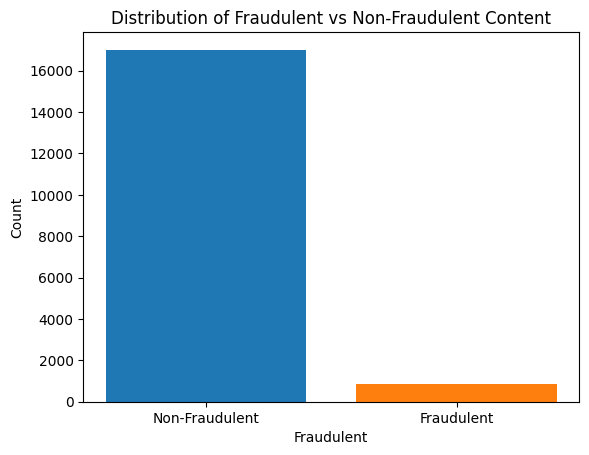

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' contains your DataFrame

# Count occurrences of each category in the 'fraudulent' column
fraudulent_counts = data['fraudulent'].value_counts()

# Plot the counts with default colors
plt.bar(fraudulent_counts.index, fraudulent_counts.values, color=['C0', 'C1'])

# Add labels and title
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Content')

# Add x-axis labels
plt.xticks(fraudulent_counts.index, ['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.show()


In [163]:
# Fill missing values with empty strings
data.fillna('', inplace=True)

In [164]:
data['text'] = data['title'] + ' ' + data['location'] + ' ' + data['brand'] +   ' ' + data['breadcrumbs'] +   ' '+ data['cleaned_features'] +' '+ data['industry']


In [165]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['title', 'location', 'brand', 'breadcrumbs', 'cleaned_features','features', 'industry','asin','has_company_logo','has_questions']
data.drop(columns=columns_to_drop, inplace=True)

In [166]:
data.head()

url             price  \
0  https://www.amazon.co.uk/dp/B08BLP231K            £50.00   
1  https://www.amazon.co.uk/dp/B08N587YZ9  £49.57 - £234.95   
2  https://www.amazon.co.uk/dp/B0918K4H1W                     
3  https://www.amazon.co.uk/dp/B07KMB98CG  £67.00 - £182.44   
4  https://www.amazon.co.uk/dp/B08CN3S1ZK   £38.96 - £81.10   

                                     product_details  fraudulent  \
0  Package Dimensions‏:‎31.2 x 21.4 x 11.4 cm; 82...           0   
1  Product Dimensions‏:‎32.51 x 21.84 x 12.19 cm;...           0   
2  Is Discontinued By Manufacturer‏:‎NoDate First...           0   
3  Package Dimensions‏:‎28.96 x 19.81 x 10.16 cm;...           0   
4  Package Dimensions‏:‎34.6 x 21.8 x 11.6 cm; 50...           0   

                                                text  
0  Geox Jr Sandal Strada B Fisherman, Brown Red, ...  
1  Fila Women's Oakmont Tr Sneaker NZ, , Auckland...  
2  Gabor Rollingsoft Trainers in Plus Sizes Beige...  
3  Merrell Women'S Bare Access Xtr Trail Running ...  
4  Desigual Women's Shoes_Runner_cmofl Sneakers W...

In [167]:
fraud_text = data[data.fraudulent==1].text
actual_text = data[data.fraudulent==0].text

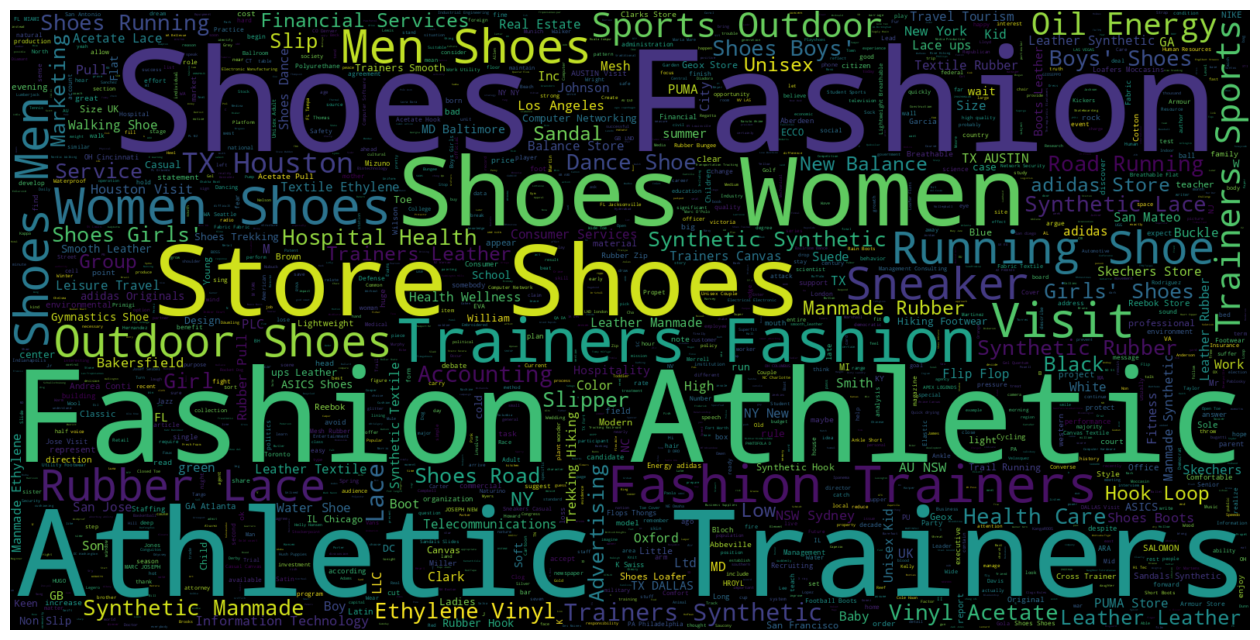

In [168]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16, 14))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(fraud_text)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

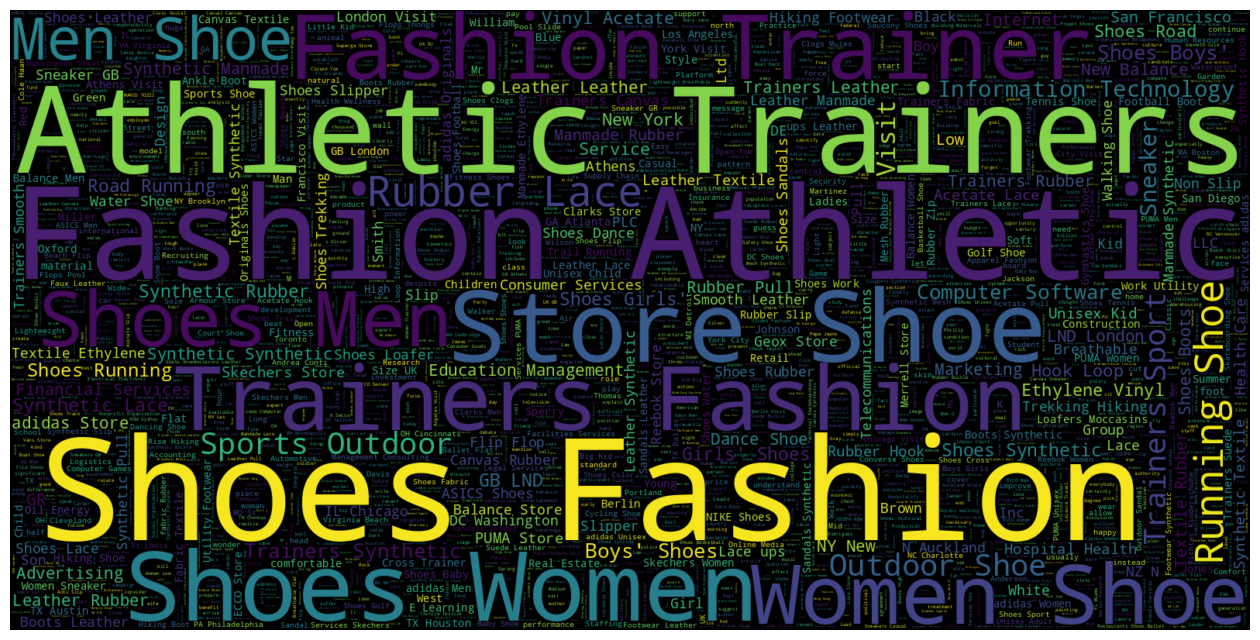

In [169]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16, 14))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(actual_text)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [170]:
import spacy
from spacy.lang.en import English
import string

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
parser = English()

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Custom analyzer function to preprocess text
def spacy_tokenizer(sentence):
    # Parse the sentence using SpaCy
    doc = nlp(sentence)
    
    # Lemmatize each token and convert to lowercase
    mytokens = [token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc]
    
    # Remove stop words and punctuations
    mytokens = [token for token in mytokens if token not in stop_words and token not in punctuations]
    
    # Return preprocessed list of tokens
    return mytokens


In [171]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [172]:
# Create CountVectorizer with custom analyzer
bow_vector = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1))

In [173]:
# splitting our data in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.2)

In [174]:
def train_model(X_train, y_train, X_test, y_test, classifier):
    # Create pipeline using Bag of Words
    pipe = Pipeline([
        ("cleaner", predictors()),
        ('vectorizer', CountVectorizer(tokenizer=spacy_tokenizer)),
        ('classifier', classifier)
    ])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Predict on the test set
    predicted = pipe.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, predicted)

    # Print accuracy
    print(f"Model Accuracy: {accuracy}")

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix')
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # Return the trained model
    return pipe

Training RandomForestClassifier...
Model Accuracy: 0.9580536912751678


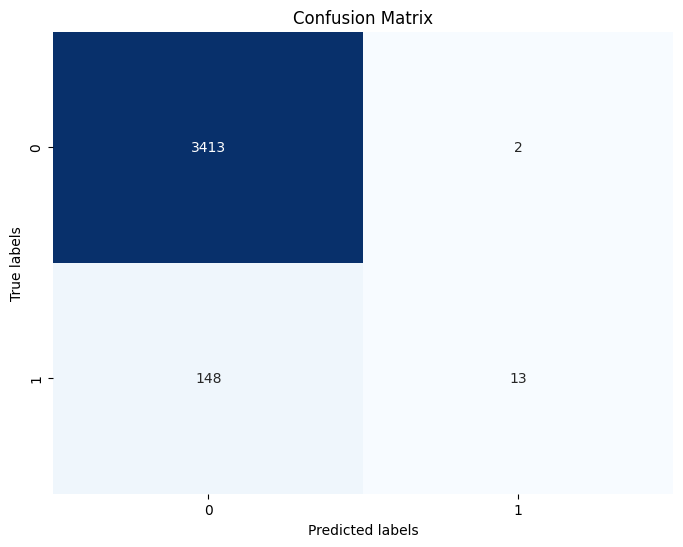

Model RandomForestClassifier saved as RandomForestClassifier_content_moderation.pkl

Training LogisticRegression...
Model Accuracy: 0.9516219239373602


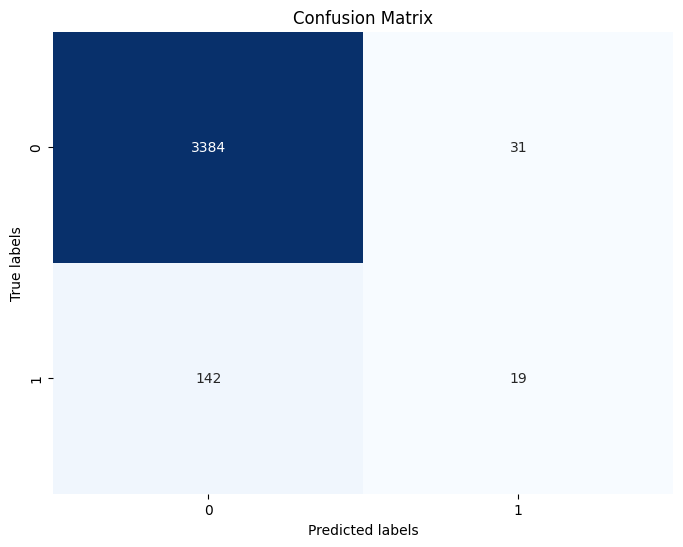

Model LogisticRegression saved as LogisticRegression_content_moderation.pkl

Training SVC...
Model Accuracy: 0.9549776286353467


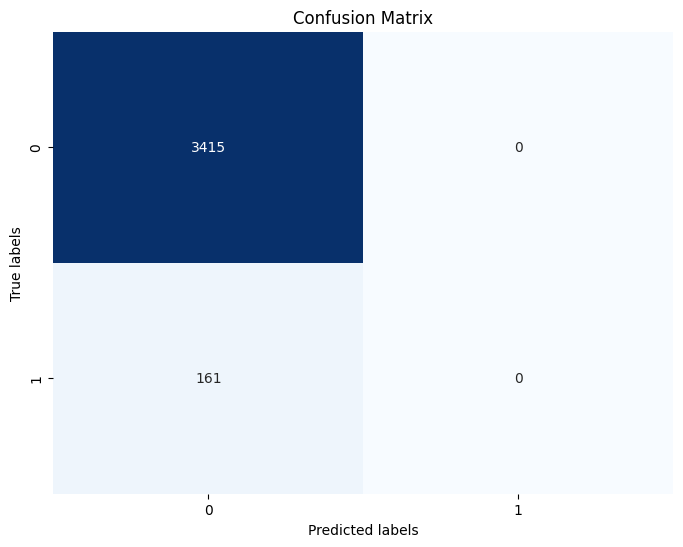

Model SVC saved as SVC_content_moderation.pkl

Training XGBClassifier...
Model Accuracy: 0.9586129753914989


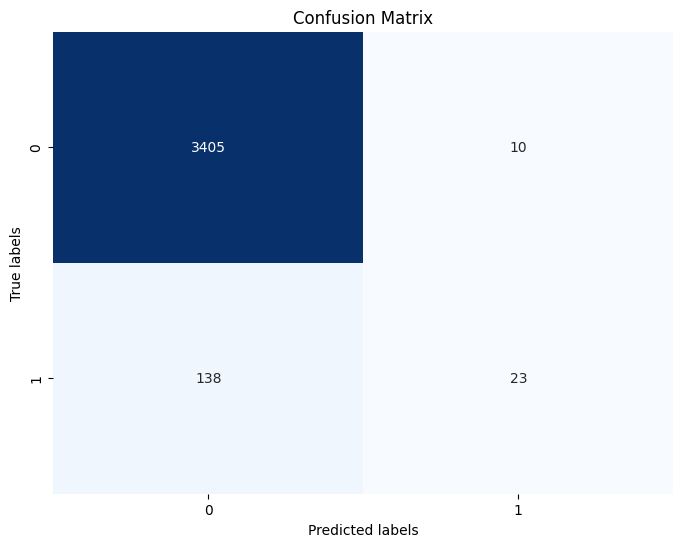

Model XGBClassifier saved as XGBClassifier_content_moderation.pkl



In [175]:
import pickle
# Define classifiers
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "XGBClassifier": XGBClassifier()
}

# Train and save each model
for name, clf in classifiers.items():
    print(f"Training {name}...")
    trained_model = train_model(X_train, y_train, X_test, y_test, clf)
    # Save the trained model
    filename = f"{name}_content_moderation.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(trained_model, file)
    print(f"Model {name} saved as {filename}\n")